In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
## complex windows
## runs through all saved window length and offets and print confusion matrix and accuracy/precision
## best interval and offset for best accuracy?

In [3]:
def check_activity_classes(file_path):
    data = pd.read_csv(file_path)
    activities = data['activity'].unique()
    missing_activities = [activity for activity in range(10) if activity not in activities]
    return missing_activities

def check_all_files():
    for length in np.arange(4, 9):
        for offset in np.arange(1, 6):
            for patient in range(1, 16):
                file_path = f"HAR/ppg+dalia/data/PPG_FieldStudy/S{patient}/S{patient}_E4/complex_windows/length_{length}/offset_{offset}.csv"
                if os.path.exists(file_path):
                    missing_activities = check_activity_classes(file_path)
                    if missing_activities:
                        print(f"S{patient} Length {length} Offset {offset} is missing activities: {missing_activities}")
                    else:
                        print(f"S{patient} Length {length} Offset {offset} contains all activities.")
                else:
                    print(f"File not found: {file_path}")

check_all_files()

S1 Length 4 Offset 1 contains all activities.
S2 Length 4 Offset 1 contains all activities.
S3 Length 4 Offset 1 contains all activities.
S4 Length 4 Offset 1 contains all activities.
S5 Length 4 Offset 1 contains all activities.
S6 Length 4 Offset 1 contains all activities.
S7 Length 4 Offset 1 contains all activities.
S8 Length 4 Offset 1 contains all activities.
S9 Length 4 Offset 1 contains all activities.
S10 Length 4 Offset 1 contains all activities.
S11 Length 4 Offset 1 contains all activities.
S12 Length 4 Offset 1 contains all activities.
S13 Length 4 Offset 1 contains all activities.
S14 Length 4 Offset 1 contains all activities.
S15 Length 4 Offset 1 contains all activities.
S1 Length 4 Offset 2 contains all activities.
S2 Length 4 Offset 2 contains all activities.
S3 Length 4 Offset 2 contains all activities.
S4 Length 4 Offset 2 contains all activities.
S5 Length 4 Offset 2 contains all activities.
S6 Length 4 Offset 2 contains all activities.
S7 Length 4 Offset 2 contain

S3 Length 6 Offset 3 contains all activities.
S4 Length 6 Offset 3 contains all activities.
S5 Length 6 Offset 3 contains all activities.
S6 Length 6 Offset 3 contains all activities.
S7 Length 6 Offset 3 contains all activities.
S8 Length 6 Offset 3 contains all activities.
S9 Length 6 Offset 3 contains all activities.
S10 Length 6 Offset 3 contains all activities.
S11 Length 6 Offset 3 contains all activities.
S12 Length 6 Offset 3 contains all activities.
S13 Length 6 Offset 3 contains all activities.
S14 Length 6 Offset 3 contains all activities.
S15 Length 6 Offset 3 contains all activities.
S1 Length 6 Offset 4 contains all activities.
S2 Length 6 Offset 4 contains all activities.
S3 Length 6 Offset 4 contains all activities.
S4 Length 6 Offset 4 contains all activities.
S5 Length 6 Offset 4 contains all activities.
S6 Length 6 Offset 4 contains all activities.
S7 Length 6 Offset 4 contains all activities.
S8 Length 6 Offset 4 contains all activities.
S9 Length 6 Offset 4 contain

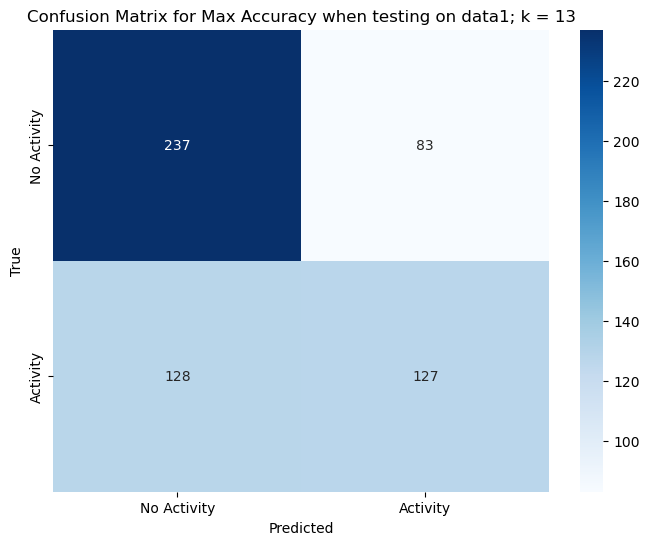

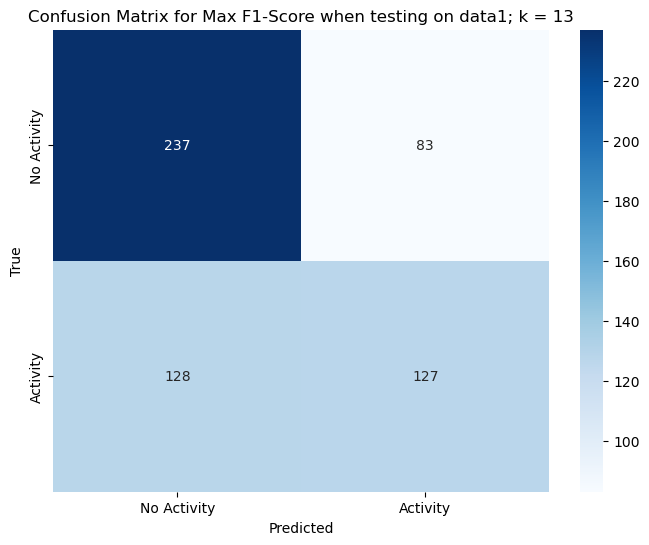

data1 has been tested on everyone


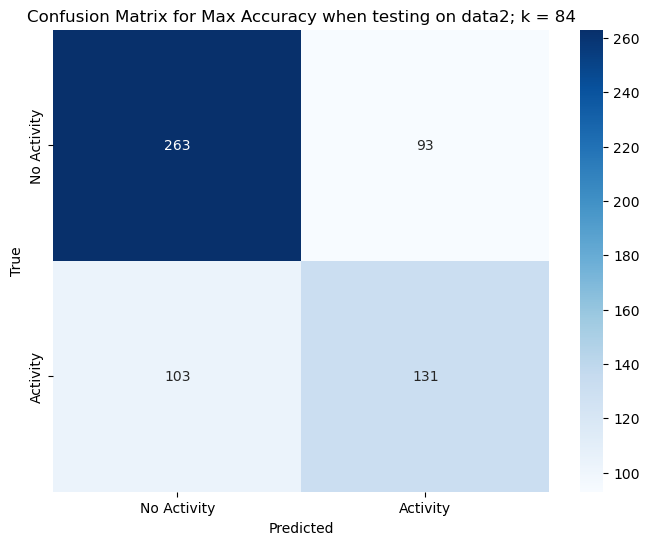

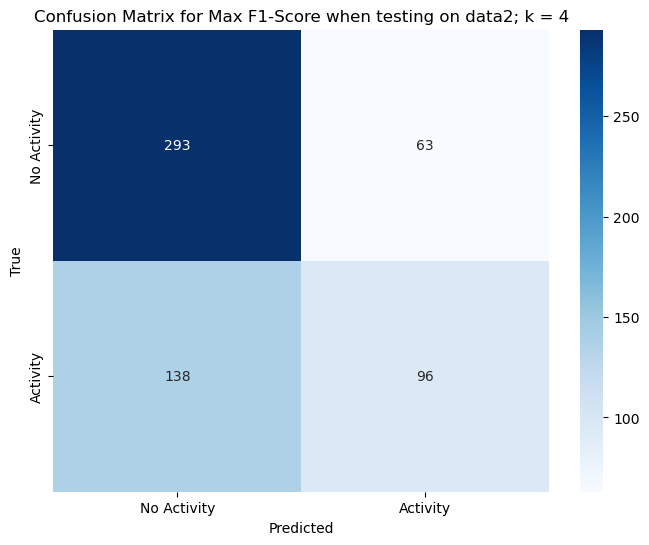

data2 has been tested on everyone


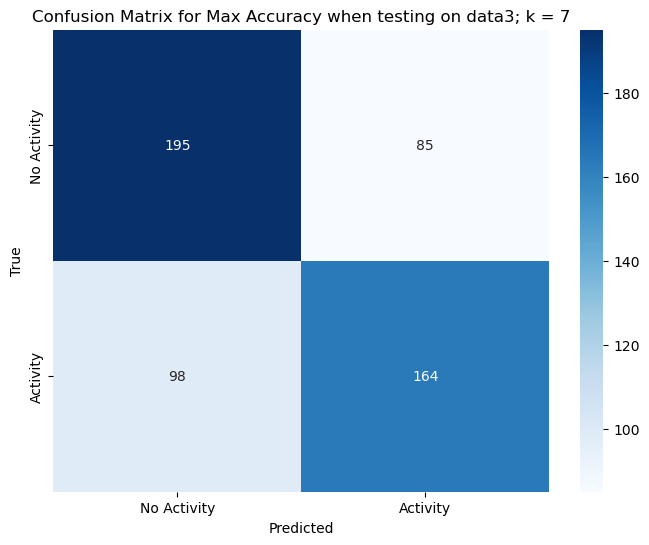

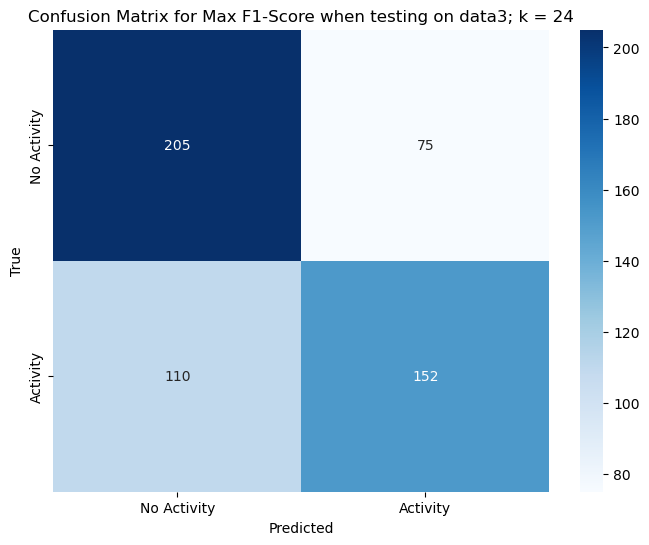

data3 has been tested on everyone


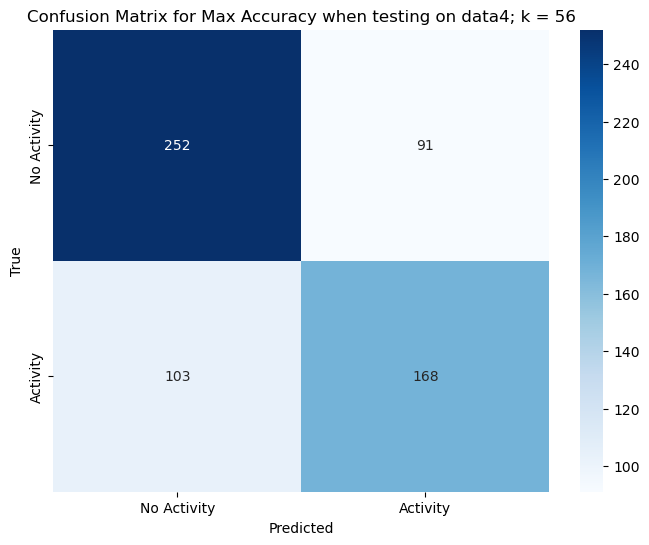

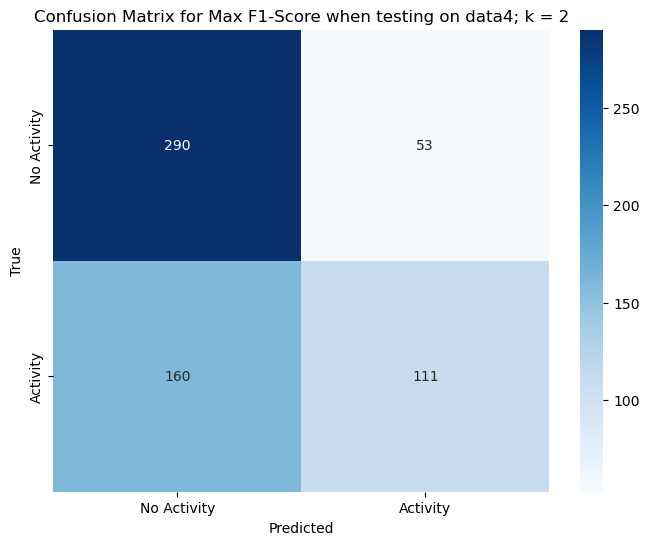

data4 has been tested on everyone


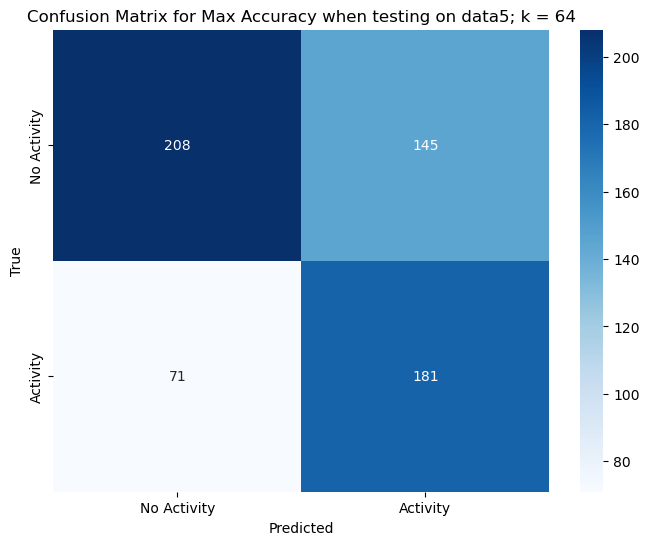

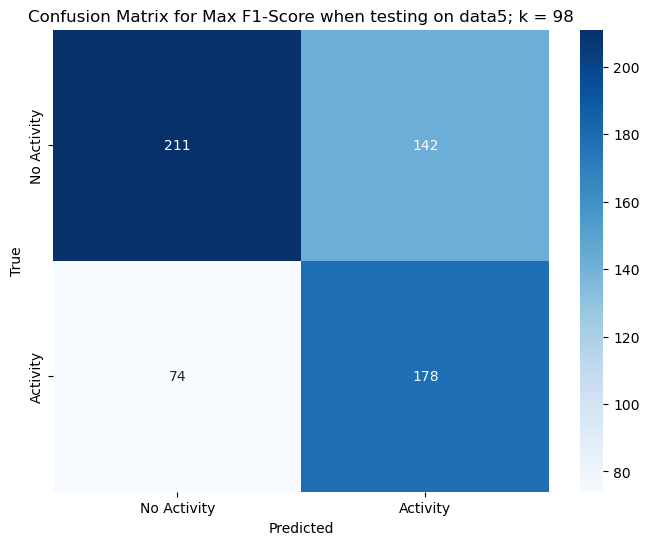

data5 has been tested on everyone


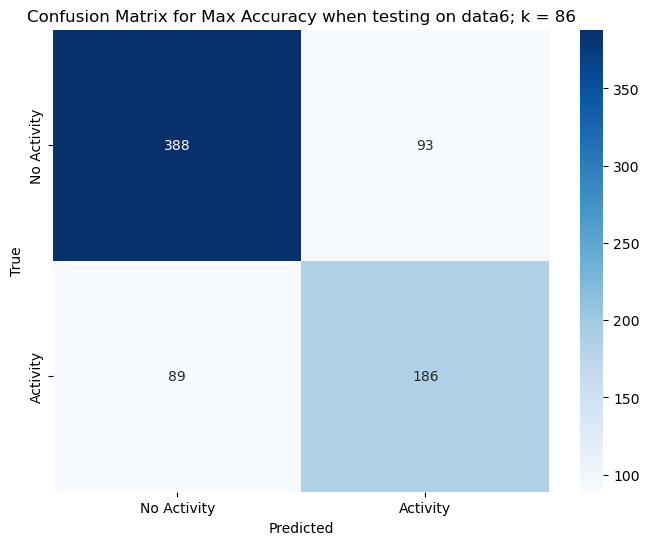

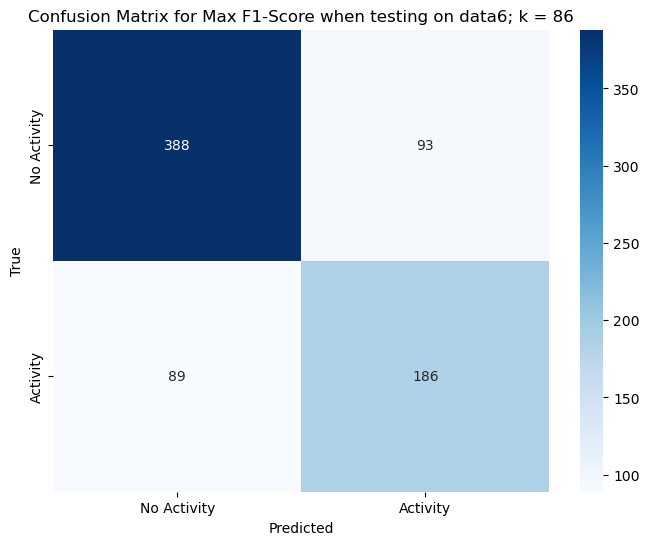

data6 has been tested on everyone


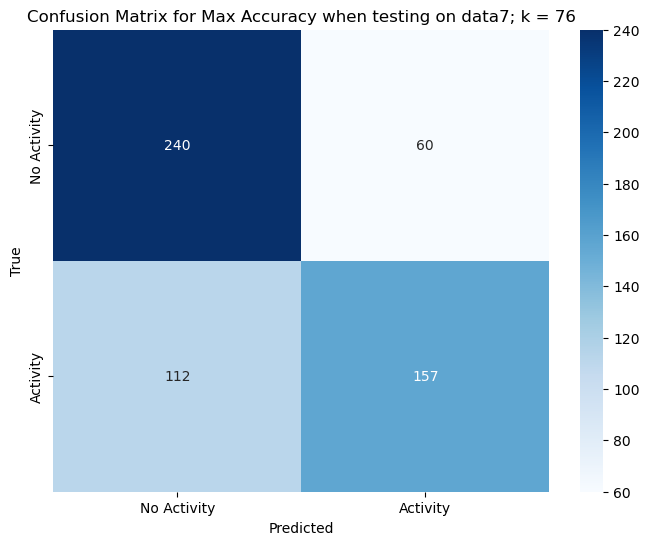

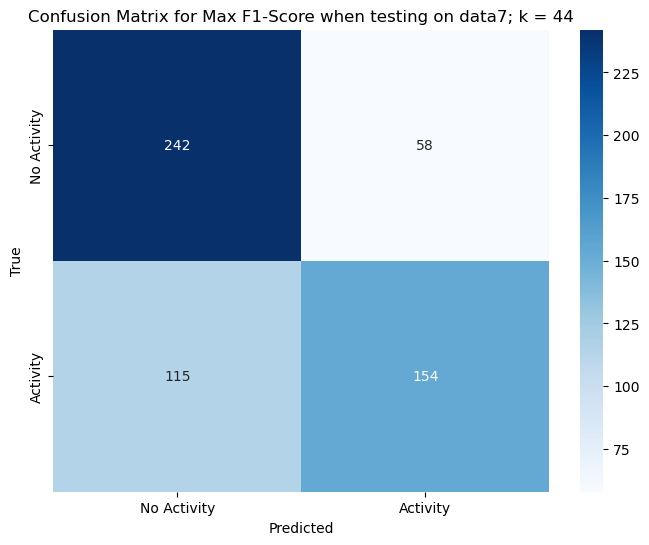

data7 has been tested on everyone


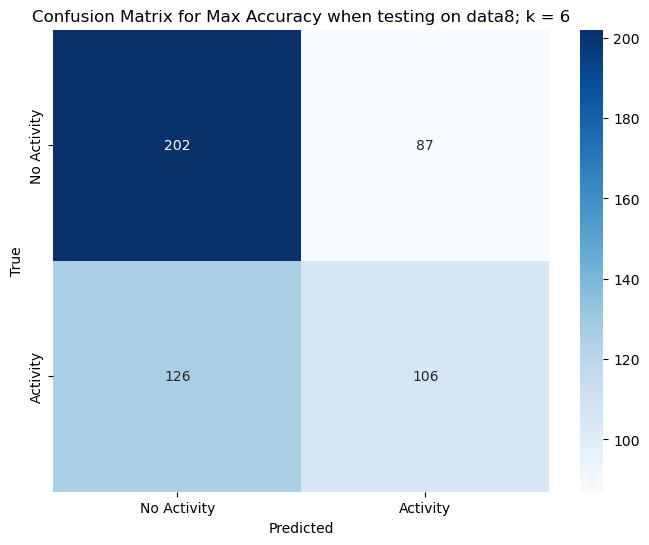

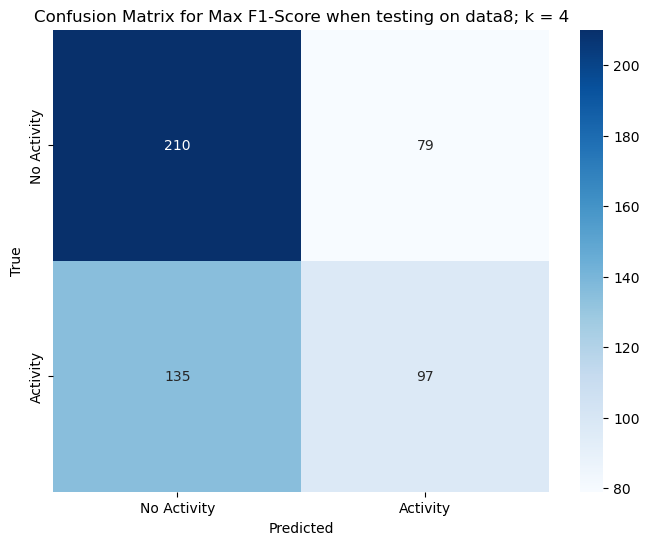

data8 has been tested on everyone


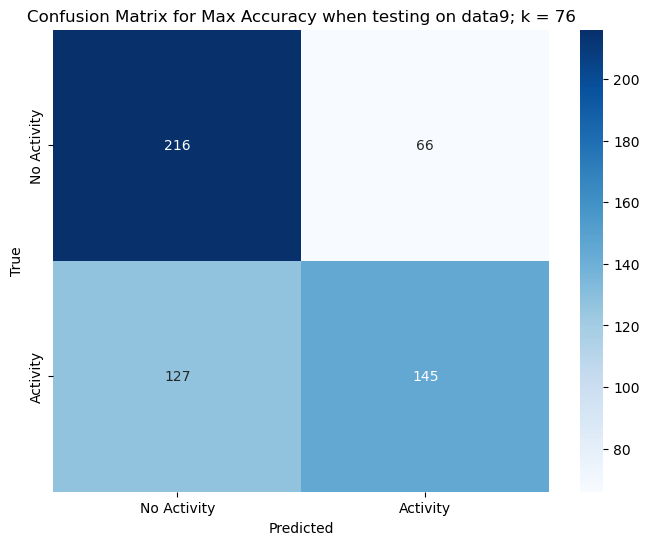

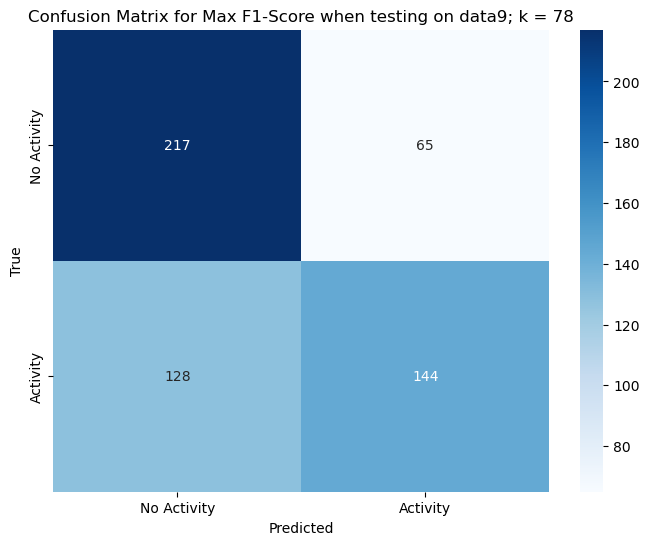

data9 has been tested on everyone


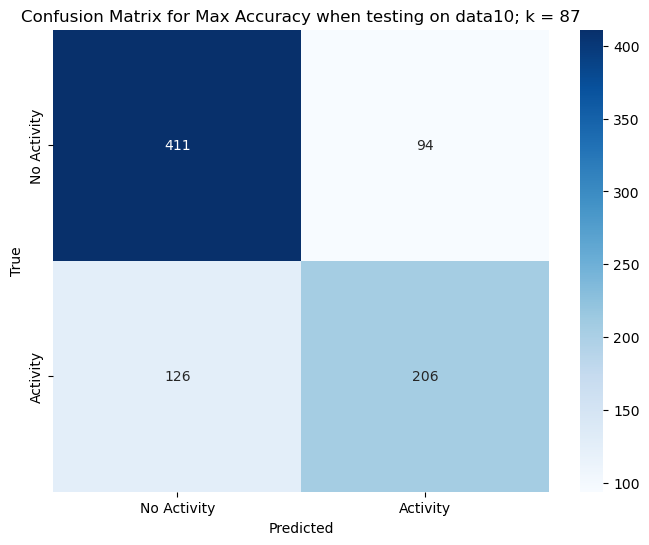

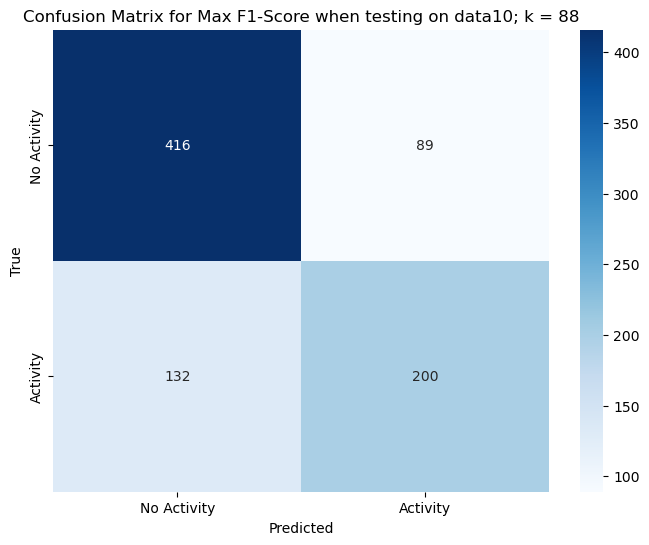

data10 has been tested on everyone


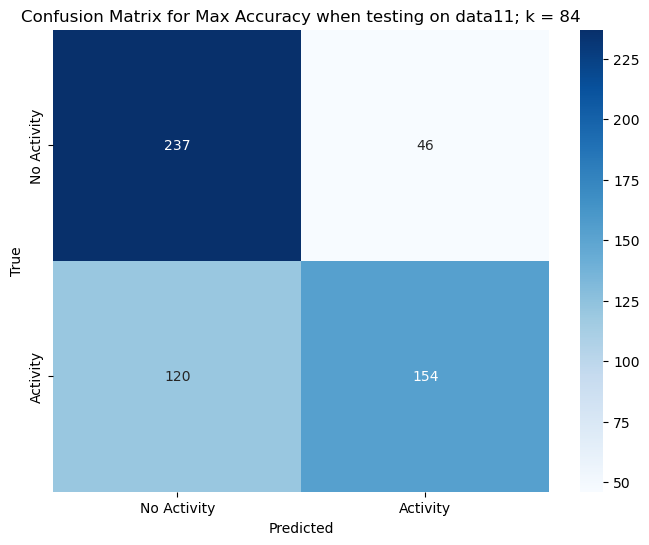

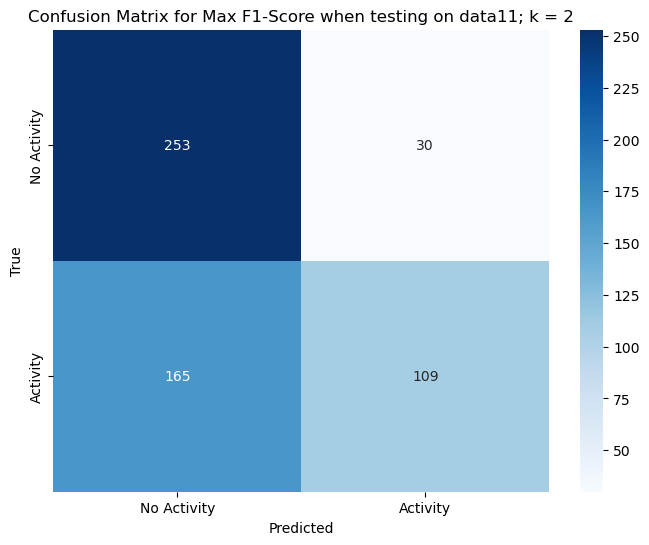

data11 has been tested on everyone


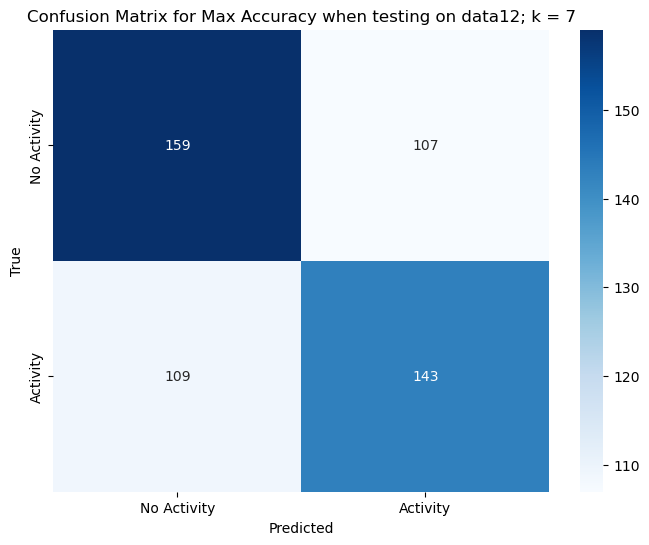

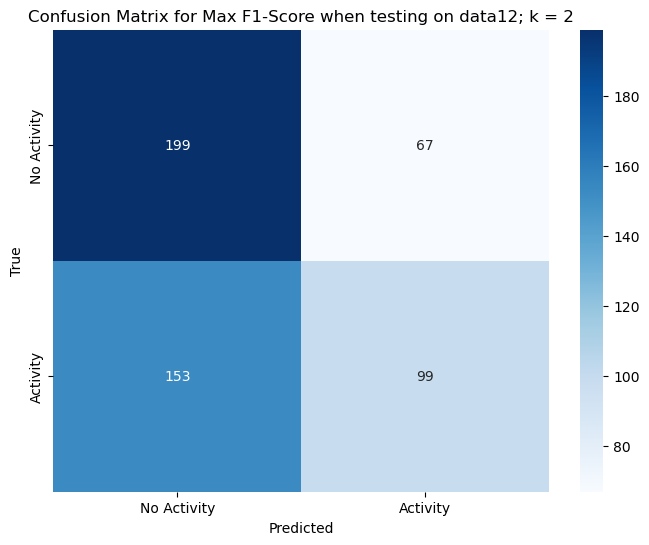

data12 has been tested on everyone


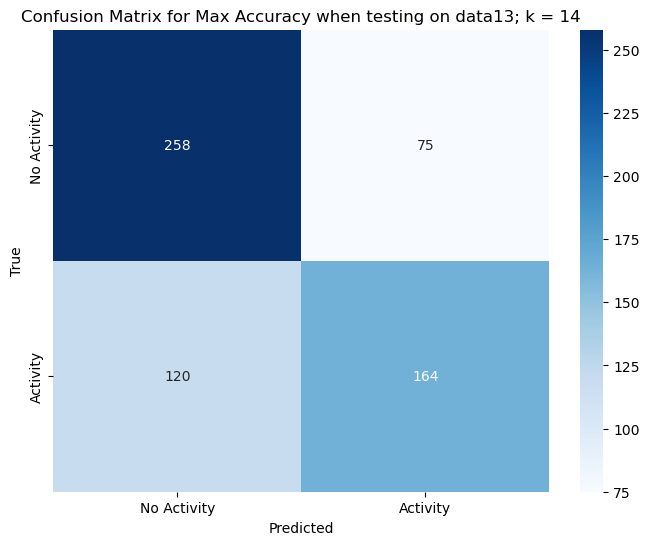

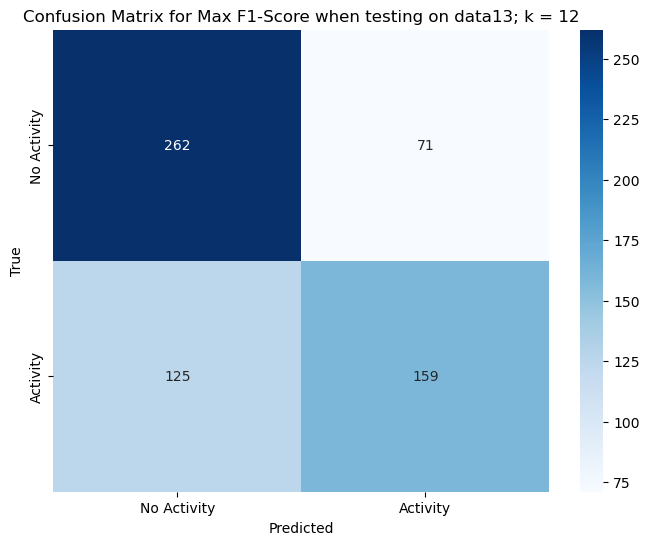

data13 has been tested on everyone


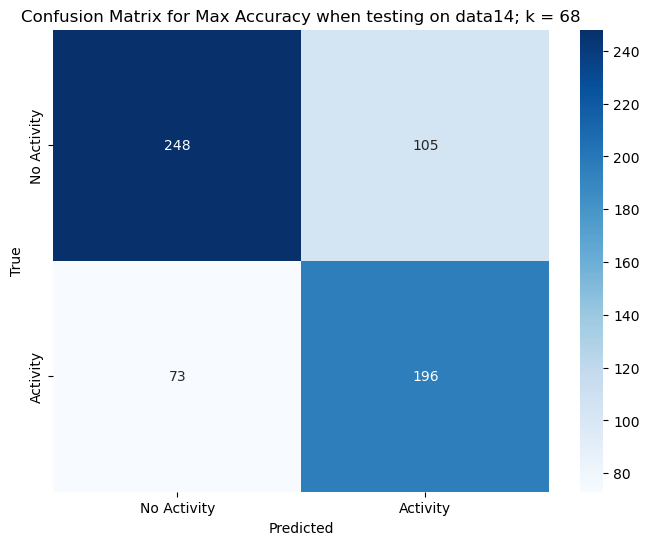

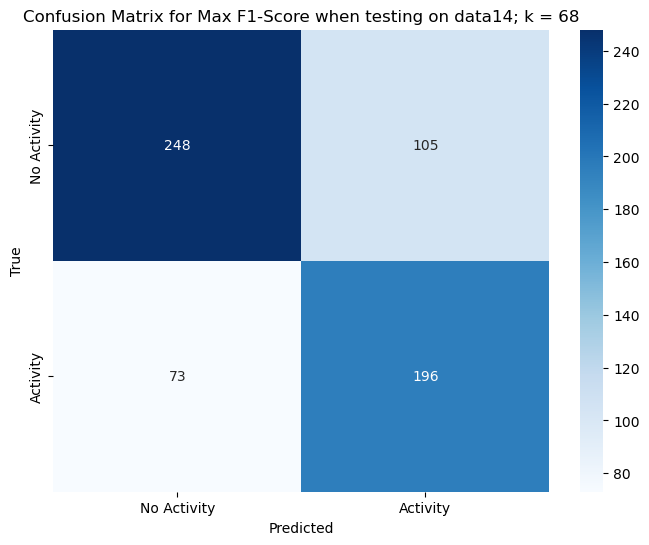

data14 has been tested on everyone


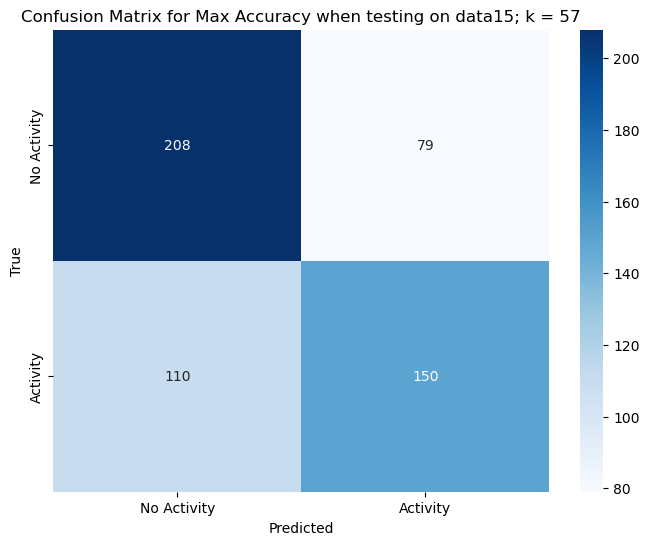

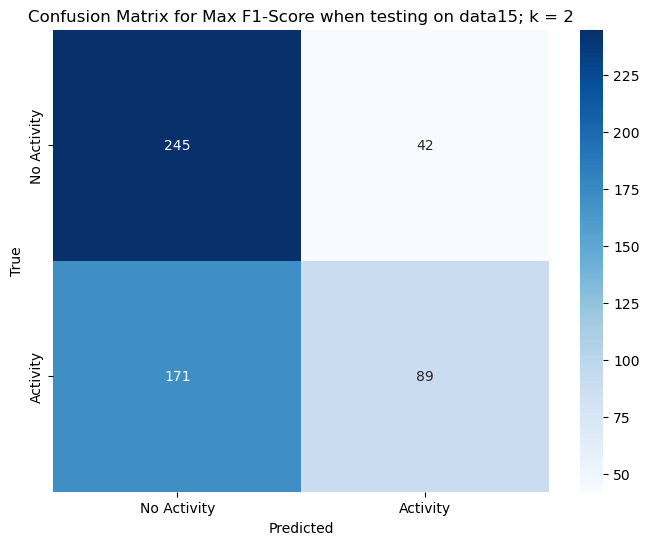

data15 has been tested on everyone


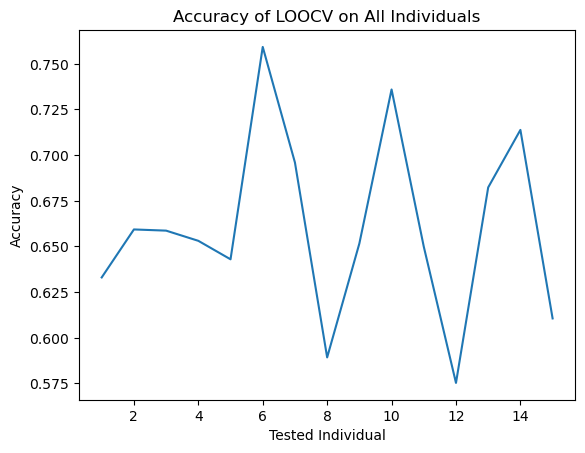

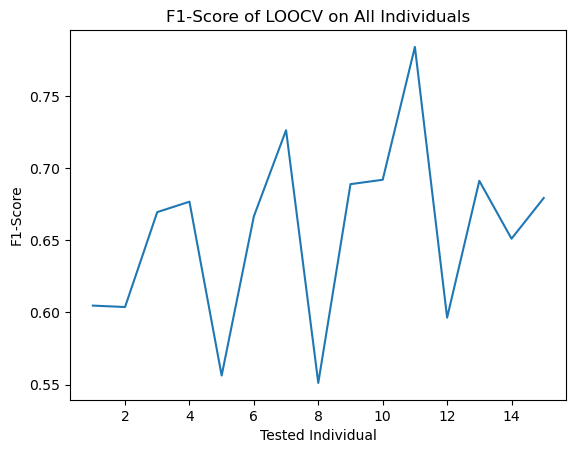

Average Accuracy:  0.6607416629347246
Average F1-Score:  0.6559258533449578


In [14]:
## ACC_specific_windowed_features.csv
## HR_specific_windowed_features.csv
## BVP_specific_windowed_features.csv
## 0: no activity
## 1: stairs, soccer, cycling, walking

def uncorrelated(df, threshold=0.85, ignore_columns=None):
    if ignore_columns is None:
        ignore_columns = ["start_time", "end_time"]
    df_for_corr = data.drop(columns=ignore_columns, errors='ignore')
    corr_matrix = df_for_corr.corr(method='spearman').abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    filtered_columns = [col for col in data.columns if col not in to_drop]
    return filtered_columns


dataframes = {}
for i in np.arange(1,16):
    name = f"data{i}"
    acc = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/ACC_specific_windowed_features.csv")
    hr = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/HR_specific_windowed_features.csv")
    bvp = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/BVP_specific_windowed_features.csv")
    acc['start_time'] = pd.to_datetime(acc['start_time'])
    hr['start_time'] = pd.to_datetime(hr['start_time'])
    bvp['start_time'] = pd.to_datetime(bvp['start_time'])
    acc['end_time'] = pd.to_datetime(acc['end_time'])
    hr['end_time'] = pd.to_datetime(hr['end_time'])
    bvp['end_time'] = pd.to_datetime(bvp['end_time'])

    common_columns = ['start_time', 'end_time', 'activity']
    data = acc.merge(hr, on=common_columns, how='inner').merge(bvp, on=common_columns, how='inner')
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data = data[~data['activity'].isin([1, 2, 7, 8, 9])]
    data.loc[data['activity'].isin([3, 4, 5, 6]), 'activity'] = 1
    dataframes[name] = data

LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]
    
    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()
    
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()
    
    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    
    k = np.arange(1,100)
    accuracy = np.array([])
    f1score = np.array([])
    maxAccK = 0
    maxF1K = 0
    maxAcc = 0
    maxF1 = 0
    for i in k:
        knn = KNeighborsClassifier(i)
        knn.fit(X_train, y_train)
        acc = (accuracy_score(testingActivity, knn.predict(testingFeatures)))
        f1 = precision_score(testingActivity, knn.predict(testingFeatures))
        accuracy = np.append(accuracy, acc)
        f1score = np.append(f1score, f1)
        if acc > maxAcc:
            maxAccK = i
            maxAcc = acc
        if f1 > maxF1:
            maxF1K = i
            maxF1 = f1


    knn = KNeighborsClassifier(maxAccK)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for Max Accuracy when testing on {tester}; k = {maxAccK}")
    plt.show()
    
    knn = KNeighborsClassifier(maxF1K)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for Max F1-Score when testing on {tester}; k = {maxF1K}")
    plt.show()
    
    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, precision_score(testingActivity, y_pred))
    
    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("F1-Score of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("F1-Score")
plt.show()

print("Average Accuracy: ", sum(LOOCVAccuracy) / len(LOOCVAccuracy))
print("Average F1-Score: ", sum(LOOCVf1_score) / len(LOOCVf1_score))


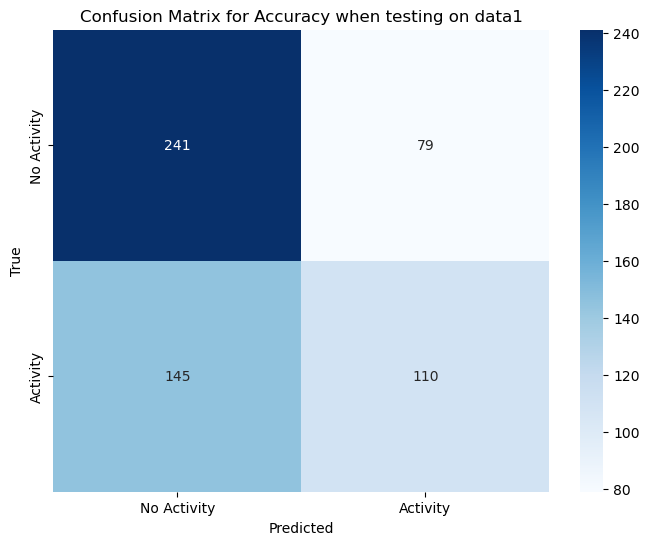

data1 has been tested on everyone


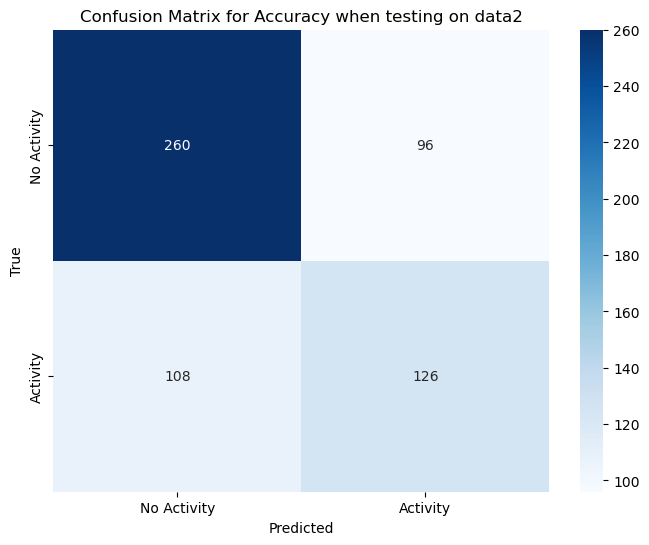

data2 has been tested on everyone


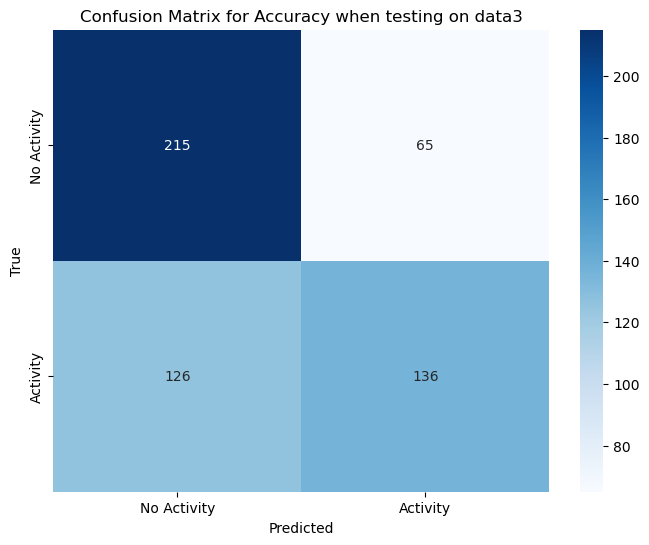

data3 has been tested on everyone


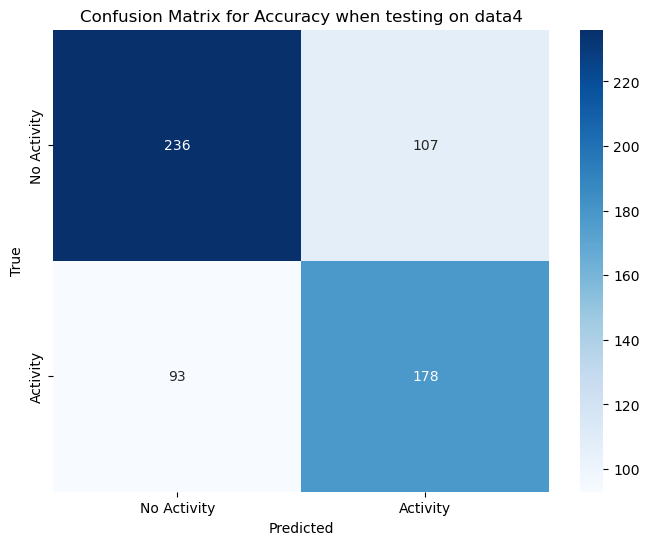

data4 has been tested on everyone


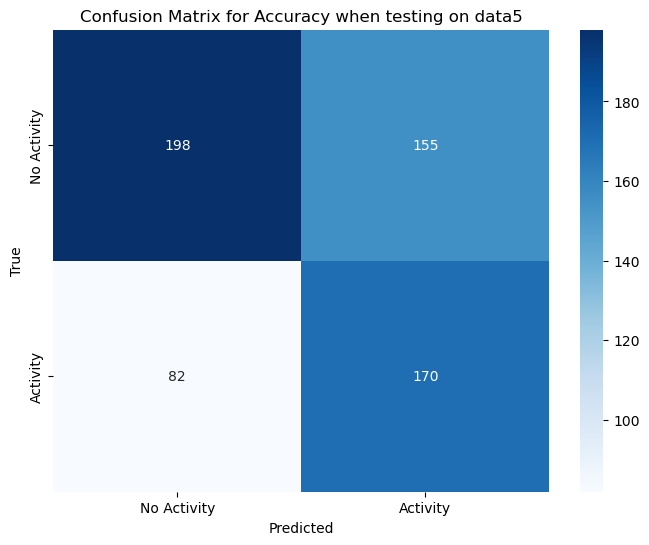

data5 has been tested on everyone


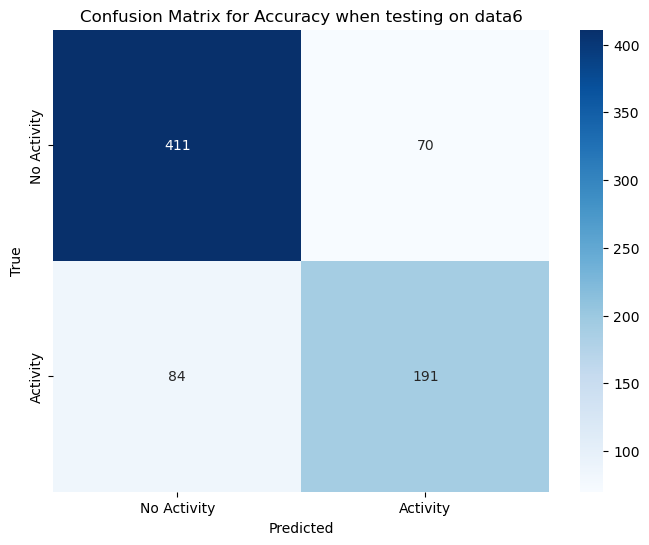

data6 has been tested on everyone


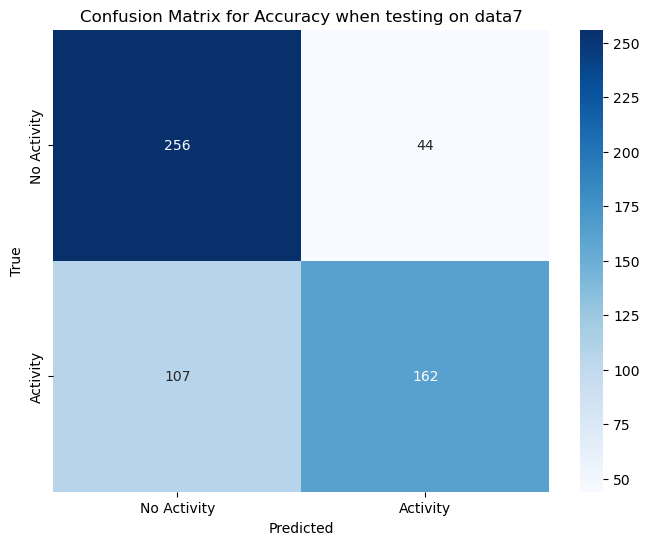

data7 has been tested on everyone


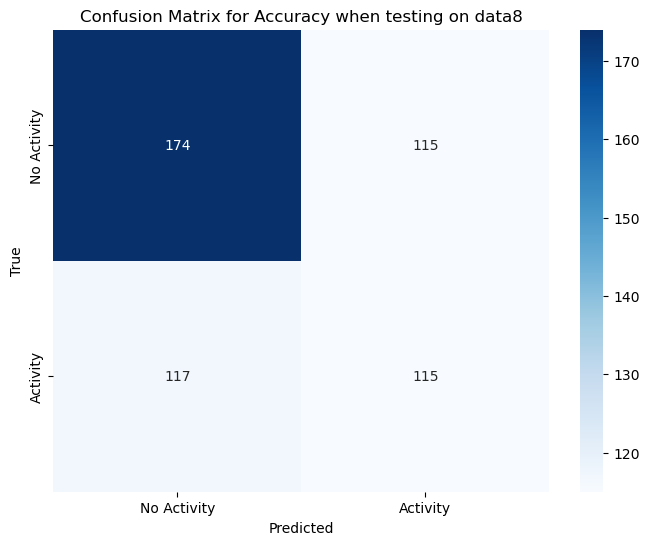

data8 has been tested on everyone


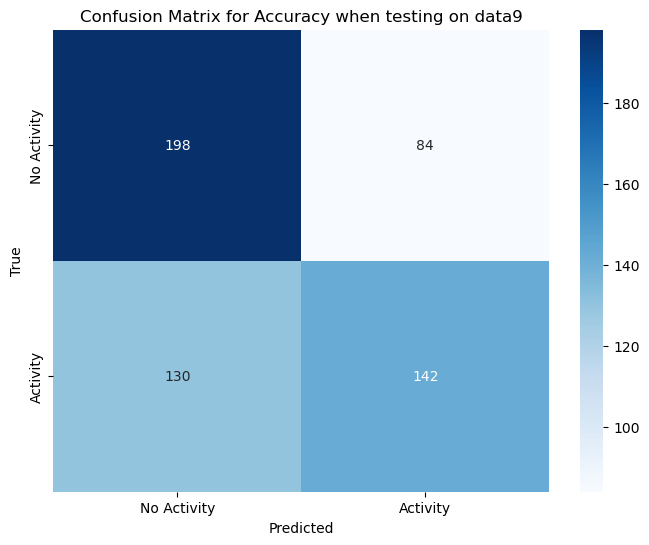

data9 has been tested on everyone


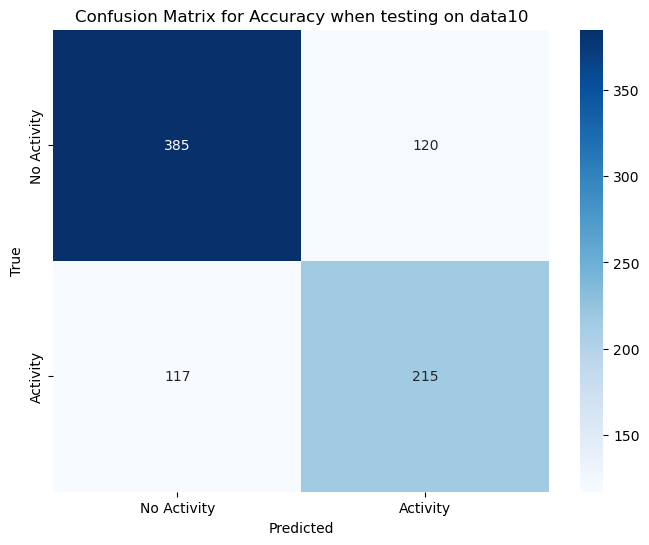

data10 has been tested on everyone


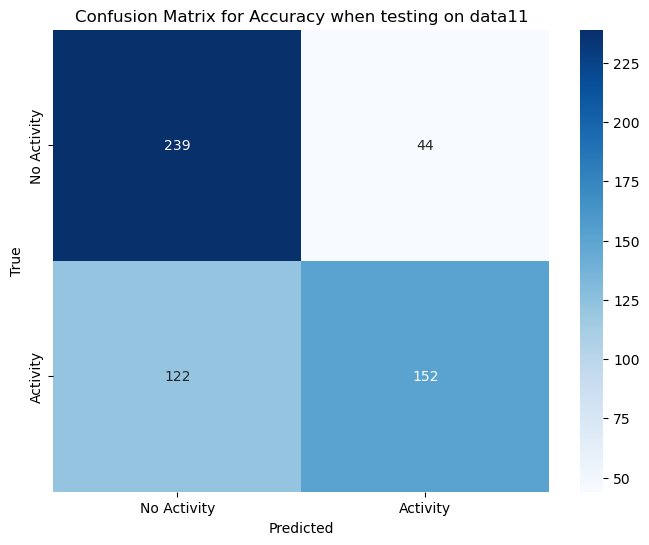

data11 has been tested on everyone


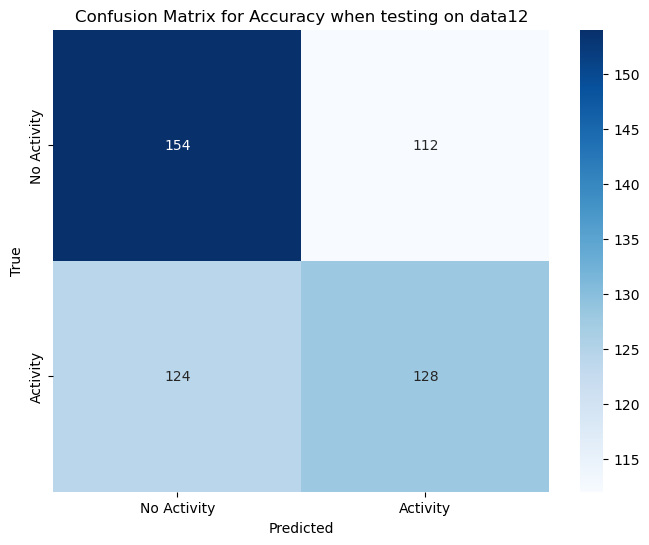

data12 has been tested on everyone


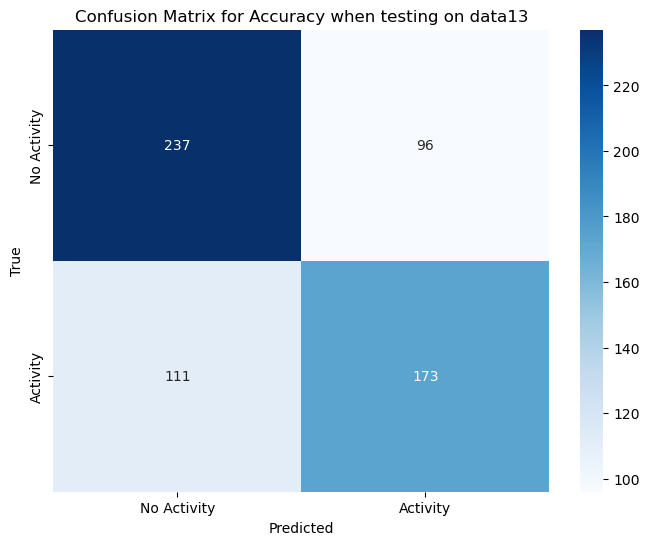

data13 has been tested on everyone


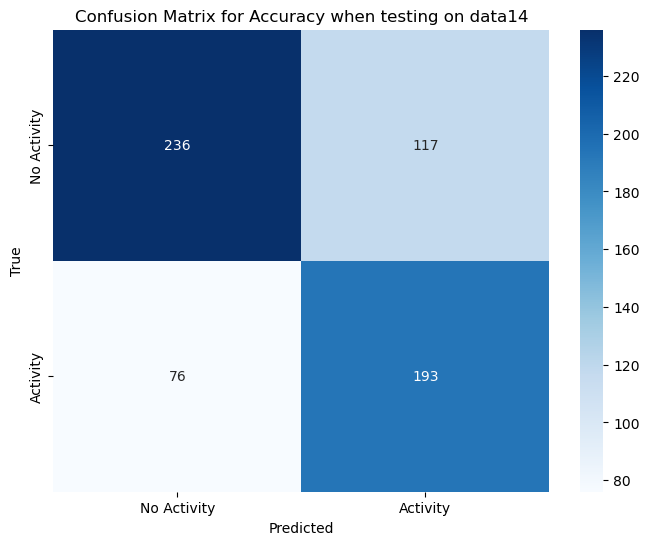

data14 has been tested on everyone


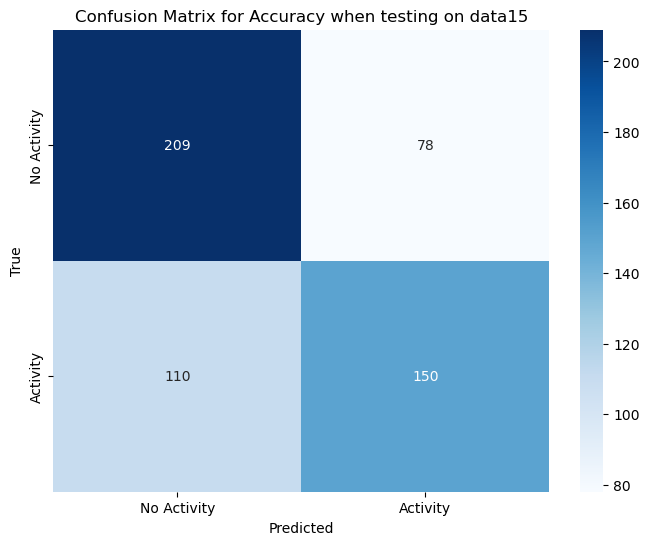

data15 has been tested on everyone


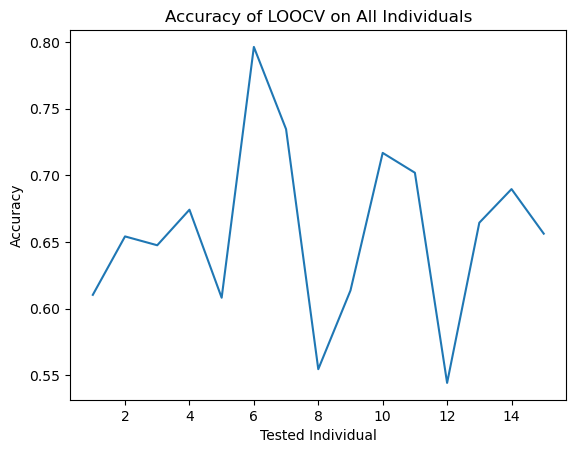

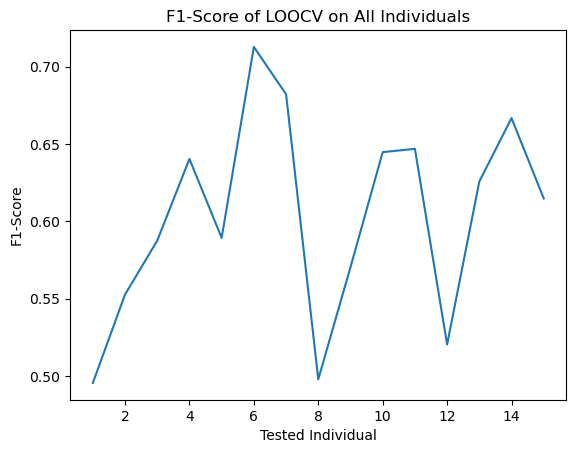

Average Accuracy:  0.6578593439291623
Average F1-Score:  0.603130754967313


In [7]:
## ACC_specific_windowed_features.csv
## HR_specific_windowed_features.csv
## BVP_specific_windowed_features.csv
## 0: no activity
## 1: stairs, soccer, cycling, walking

def uncorrelated(df, threshold=0.85, ignore_columns=None):
    if ignore_columns is None:
        ignore_columns = ["start_time", "end_time"]
    df_for_corr = data.drop(columns=ignore_columns, errors='ignore')
    corr_matrix = df_for_corr.corr(method='spearman').abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    filtered_columns = [col for col in data.columns if col not in to_drop]
    return filtered_columns


dataframes = {}
for i in np.arange(1,16):
    name = f"data{i}"
    acc = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/ACC_specific_windowed_features.csv")
    hr = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/HR_specific_windowed_features.csv")
    bvp = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/BVP_specific_windowed_features.csv")
    acc['start_time'] = pd.to_datetime(acc['start_time'])
    hr['start_time'] = pd.to_datetime(hr['start_time'])
    bvp['start_time'] = pd.to_datetime(bvp['start_time'])
    acc['end_time'] = pd.to_datetime(acc['end_time'])
    hr['end_time'] = pd.to_datetime(hr['end_time'])
    bvp['end_time'] = pd.to_datetime(bvp['end_time'])

    common_columns = ['start_time', 'end_time', 'activity']
    data = acc.merge(hr, on=common_columns, how='inner').merge(bvp, on=common_columns, how='inner')
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data = data[~data['activity'].isin([1, 2, 7, 8, 9])]
    data.loc[data['activity'].isin([3, 4, 5, 6]), 'activity'] = 1
    dataframes[name] = data

LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]
    
    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()
    
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()
    
    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    svm = SVC(kernel='rbf', gamma='scale')
    svm.fit(X_train, y_train)

    y_pred = svm.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for Accuracy when testing on {tester}")
    plt.show()
    
    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, f1_score(testingActivity, y_pred))
    
    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("F1-Score of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("F1-Score")
plt.show()

print("Average Accuracy: ", sum(LOOCVAccuracy) / len(LOOCVAccuracy))
print("Average F1-Score: ", sum(LOOCVf1_score) / len(LOOCVf1_score))


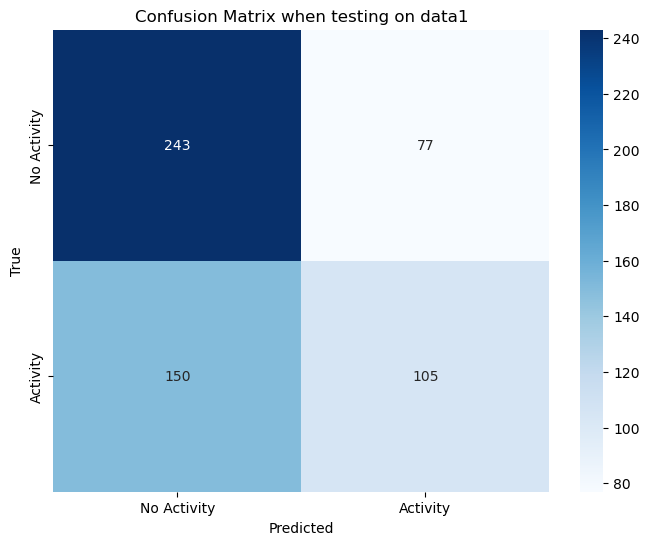

data1 has been tested on everyone


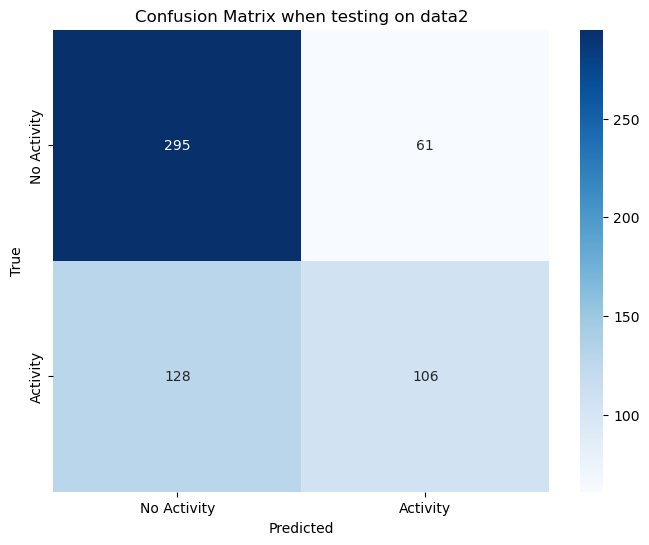

data2 has been tested on everyone


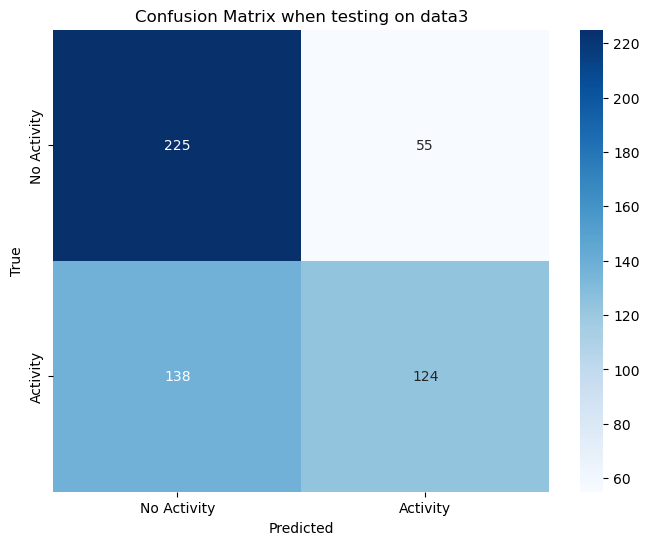

data3 has been tested on everyone


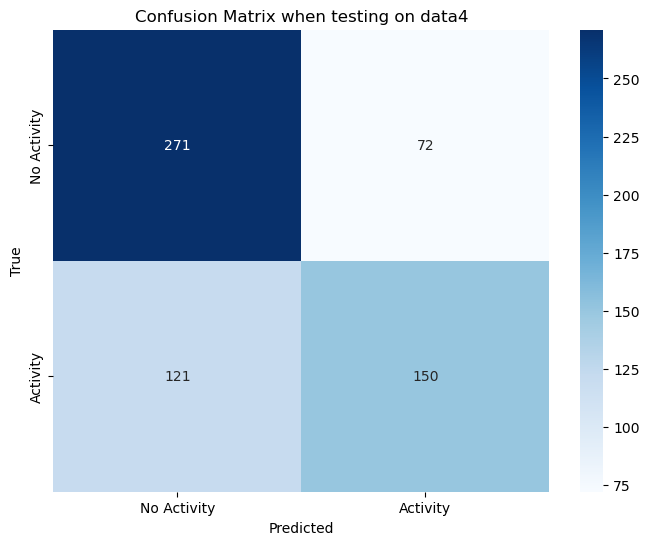

data4 has been tested on everyone


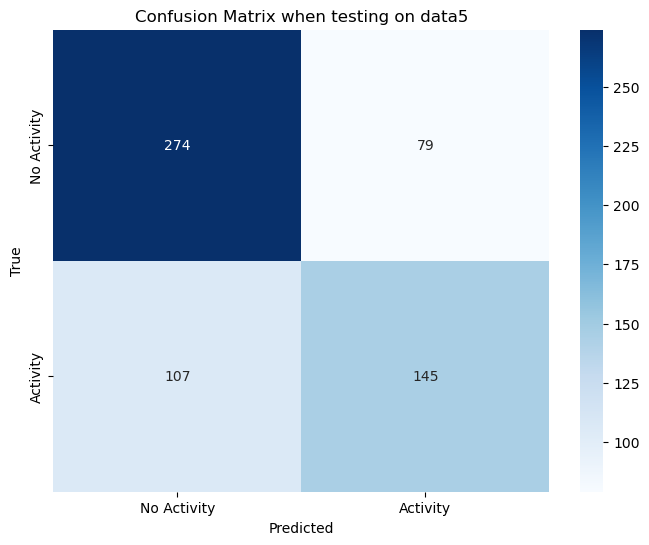

data5 has been tested on everyone


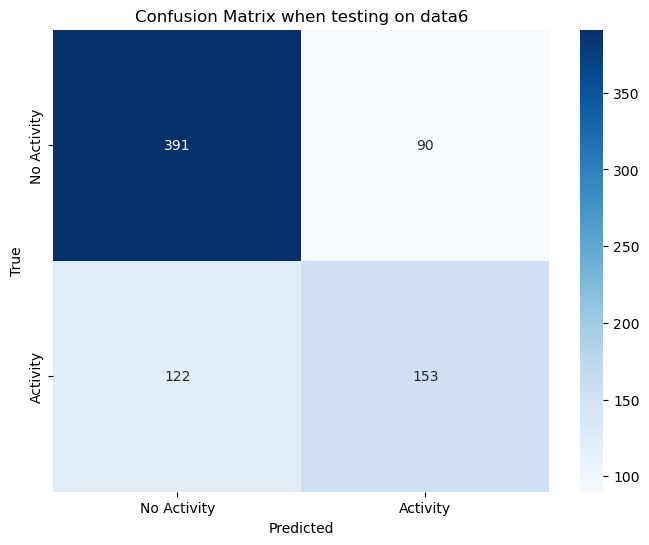

data6 has been tested on everyone


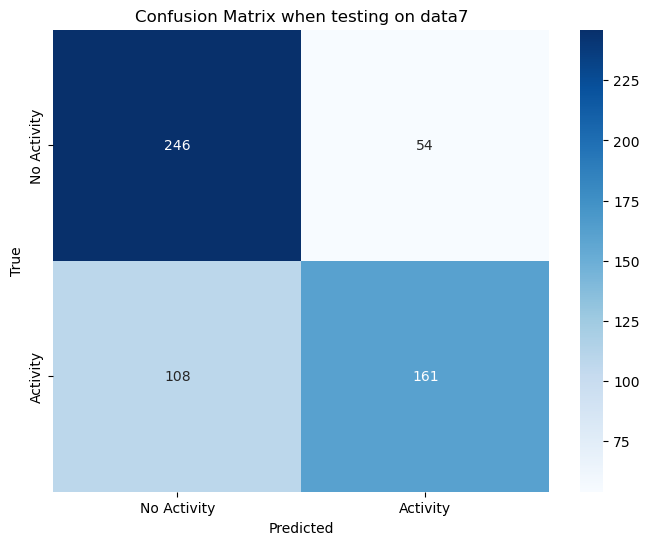

data7 has been tested on everyone


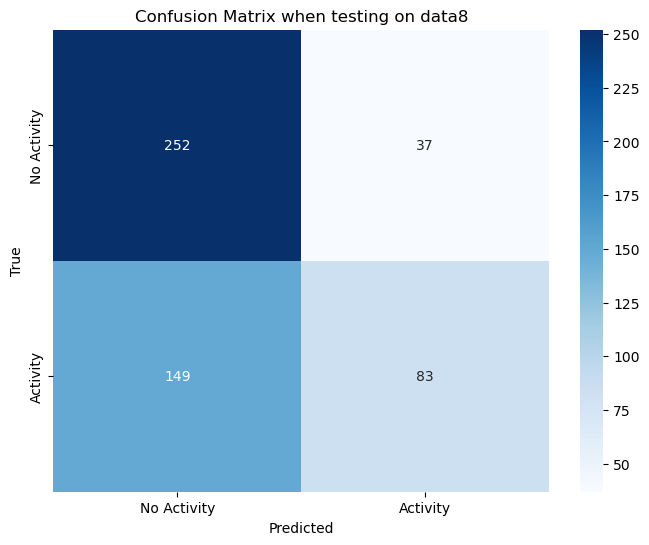

data8 has been tested on everyone


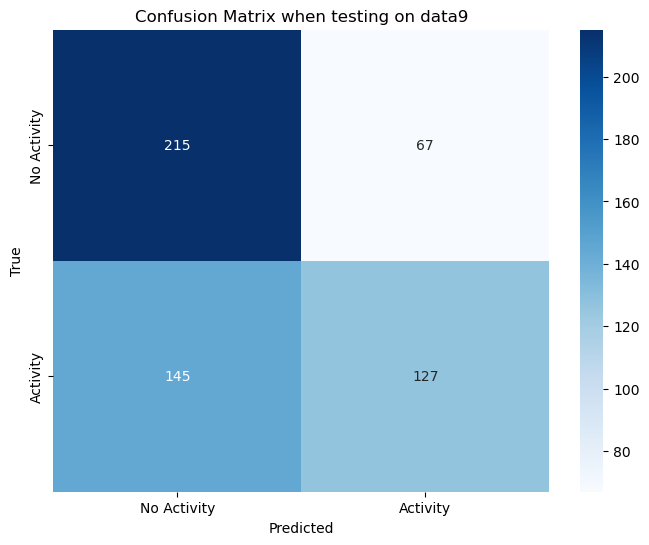

data9 has been tested on everyone


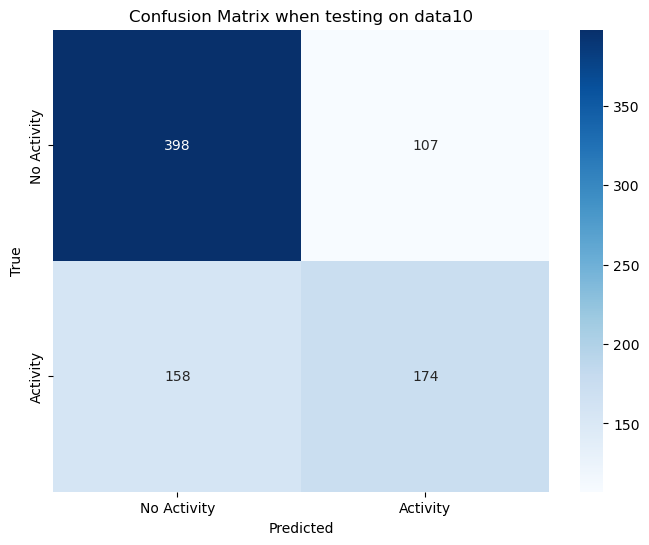

data10 has been tested on everyone


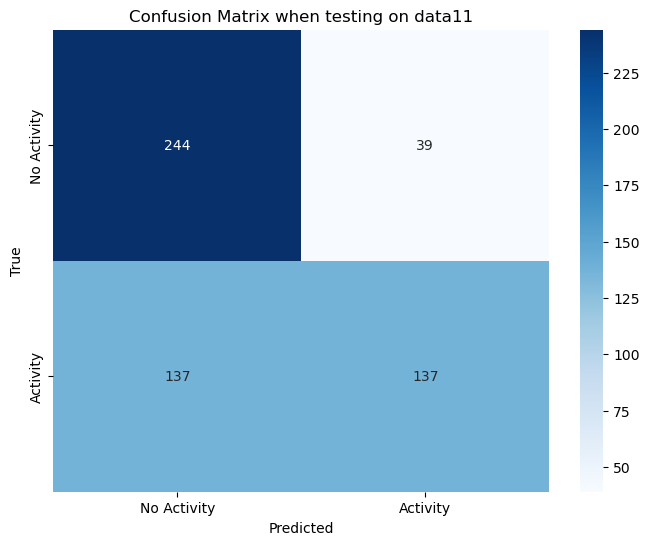

data11 has been tested on everyone


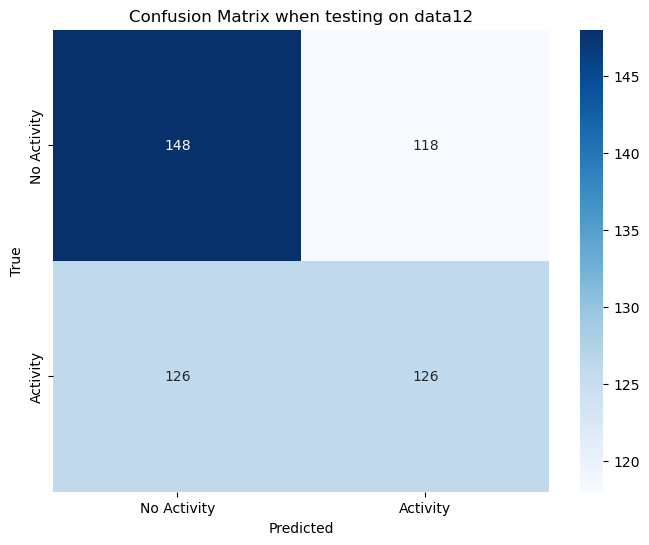

data12 has been tested on everyone


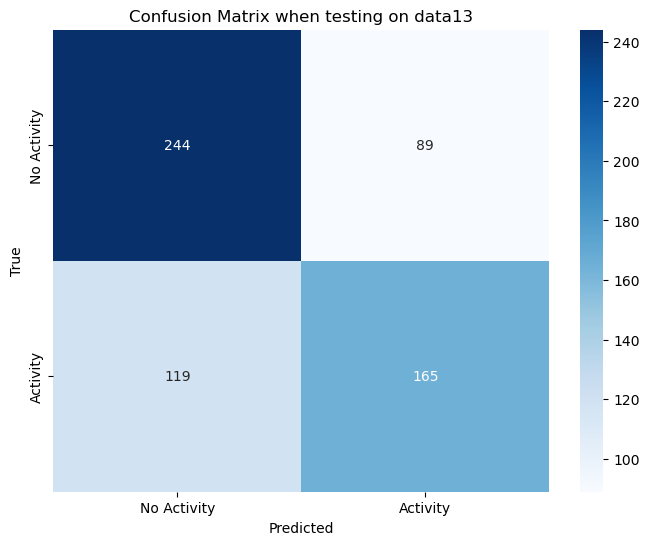

data13 has been tested on everyone


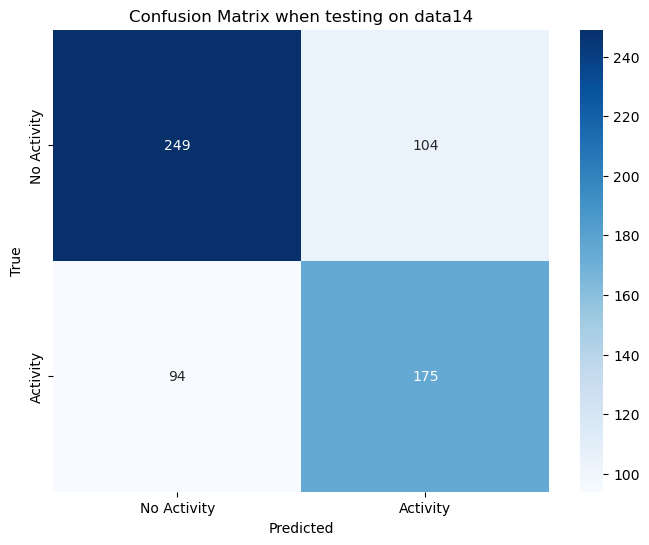

data14 has been tested on everyone


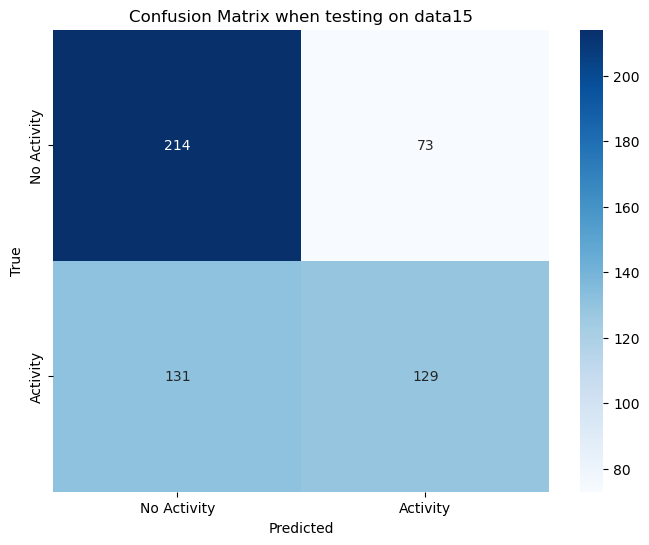

data15 has been tested on everyone


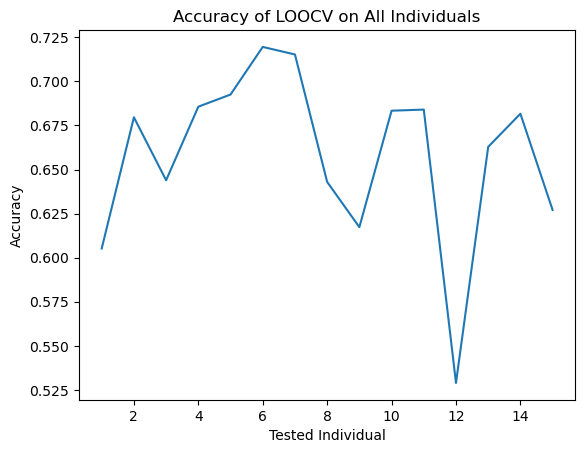

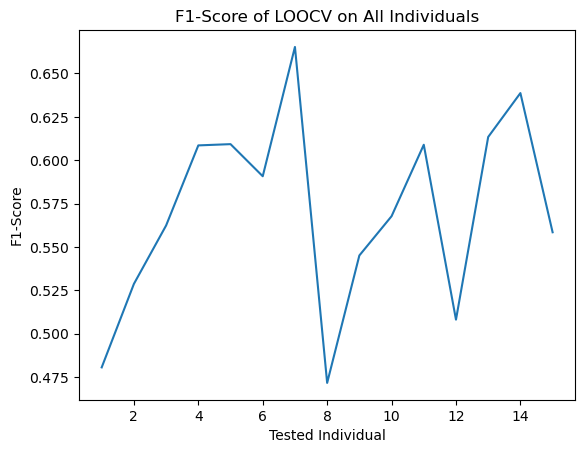

Average Accuracy:  0.6580129877310428
Average F1-Score:  0.570479380818109


In [8]:
## ACC_specific_windowed_features.csv
## HR_specific_windowed_features.csv
## BVP_specific_windowed_features.csv
## 0: no activity
## 1: stairs, soccer, cycling, walking

def uncorrelated(df, threshold=0.85, ignore_columns=None):
    if ignore_columns is None:
        ignore_columns = ["start_time", "end_time"]
    df_for_corr = data.drop(columns=ignore_columns, errors='ignore')
    corr_matrix = df_for_corr.corr(method='spearman').abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    filtered_columns = [col for col in data.columns if col not in to_drop]
    return filtered_columns


dataframes = {}
for i in np.arange(1,16):
    name = f"data{i}"
    acc = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/ACC_specific_windowed_features.csv")
    hr = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/HR_specific_windowed_features.csv")
    bvp = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/BVP_specific_windowed_features.csv")
    acc['start_time'] = pd.to_datetime(acc['start_time'])
    hr['start_time'] = pd.to_datetime(hr['start_time'])
    bvp['start_time'] = pd.to_datetime(bvp['start_time'])
    acc['end_time'] = pd.to_datetime(acc['end_time'])
    hr['end_time'] = pd.to_datetime(hr['end_time'])
    bvp['end_time'] = pd.to_datetime(bvp['end_time'])

    common_columns = ['start_time', 'end_time', 'activity']
    data = acc.merge(hr, on=common_columns, how='inner').merge(bvp, on=common_columns, how='inner')
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data = data[~data['activity'].isin([1, 2, 7, 8, 9])]
    data.loc[data['activity'].isin([3, 4, 5, 6]), 'activity'] = 1
    dataframes[name] = data

LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]
    
    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()
    
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()
    
    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    rf = RandomForestClassifier(n_estimators=300)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix when testing on {tester}")
    plt.show()

    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, f1_score(testingActivity, y_pred))

    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("F1-Score of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("F1-Score")
plt.show()

print("Average Accuracy: ", sum(LOOCVAccuracy) / len(LOOCVAccuracy))
print("Average F1-Score: ", sum(LOOCVf1_score) / len(LOOCVf1_score))

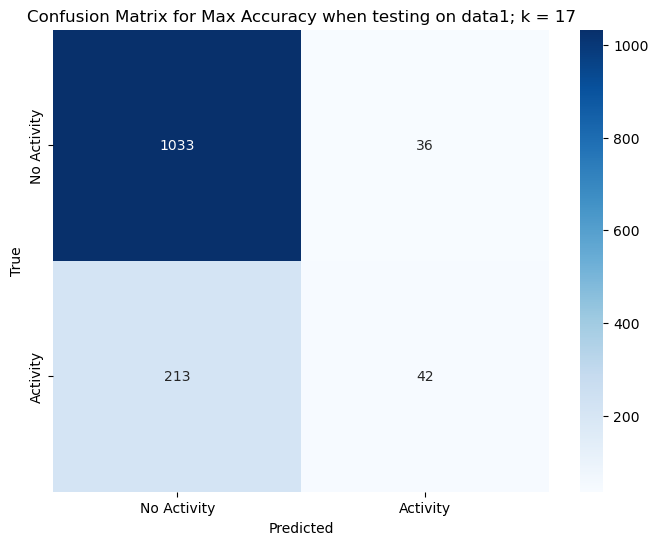

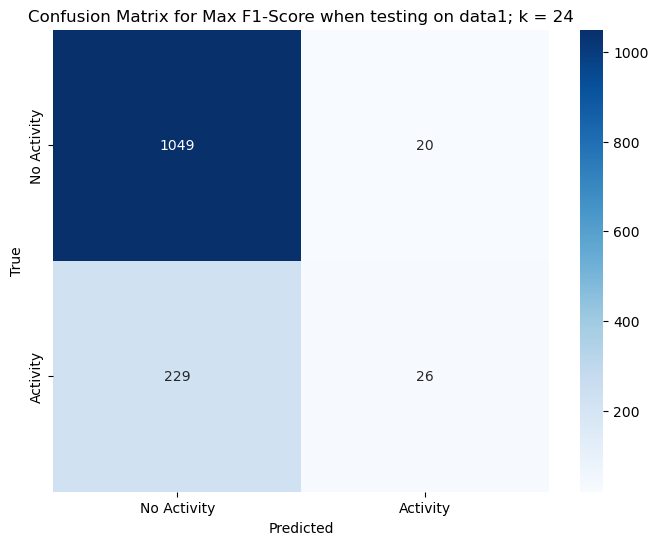

data1 has been tested on everyone


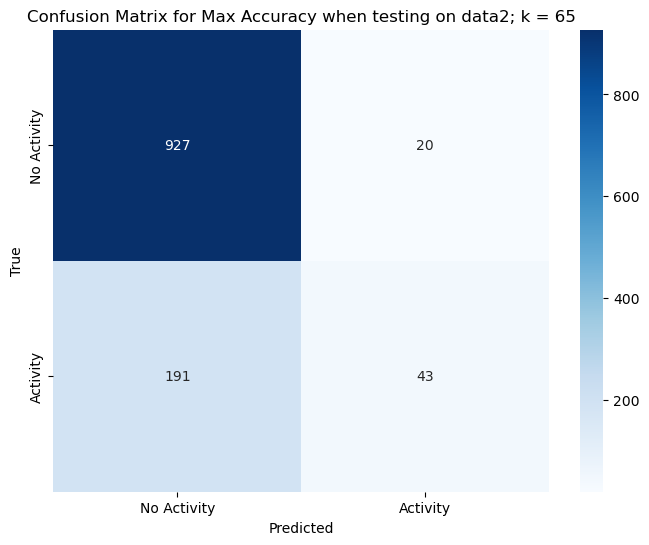

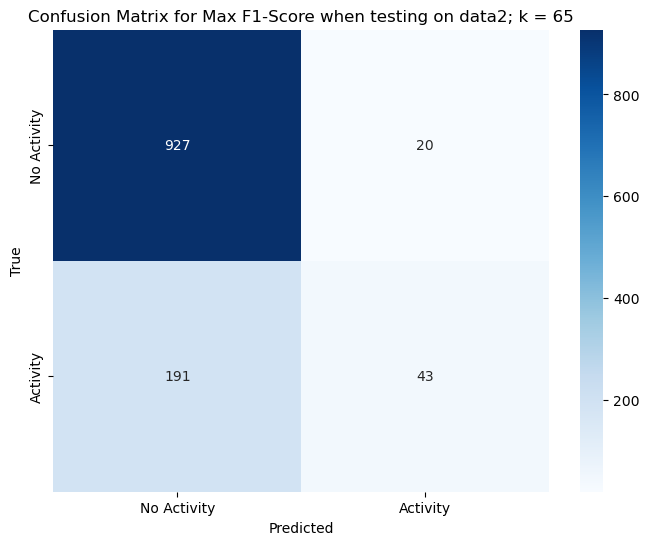

data2 has been tested on everyone


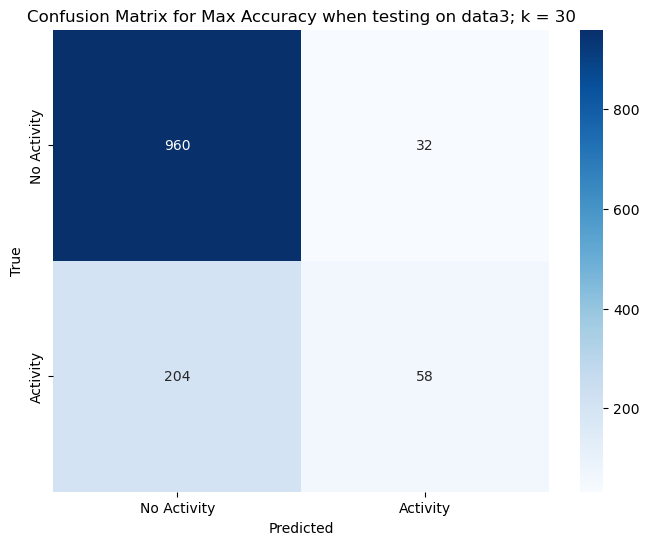

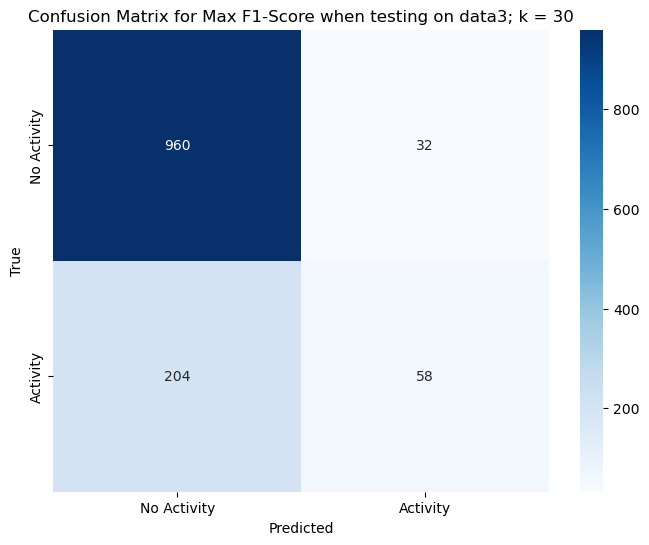

data3 has been tested on everyone


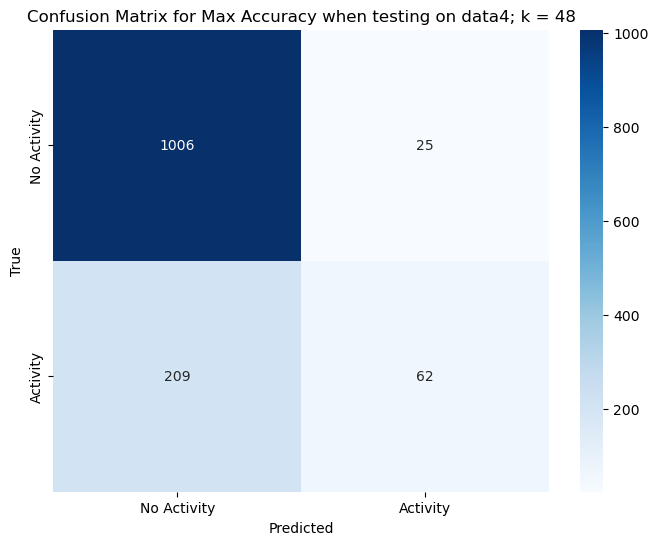

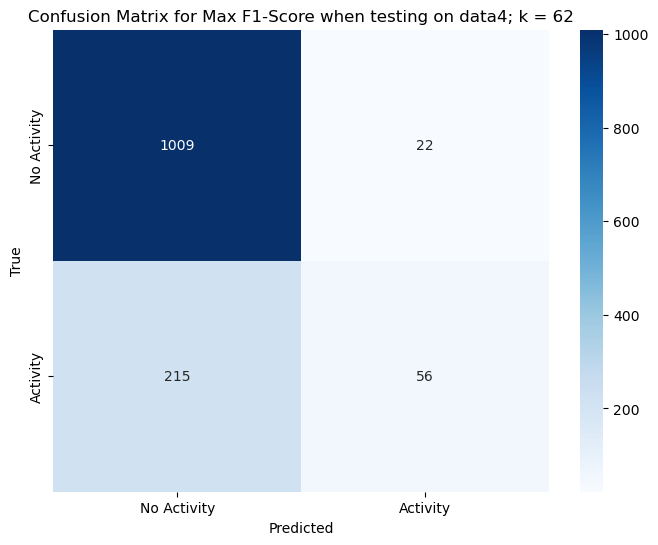

data4 has been tested on everyone


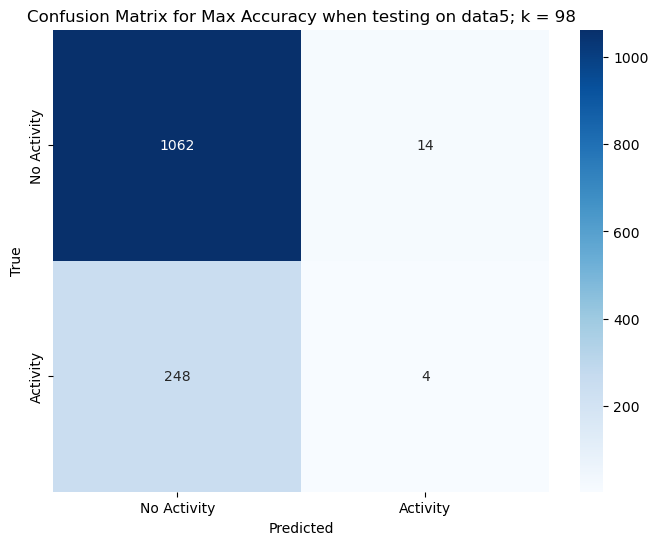

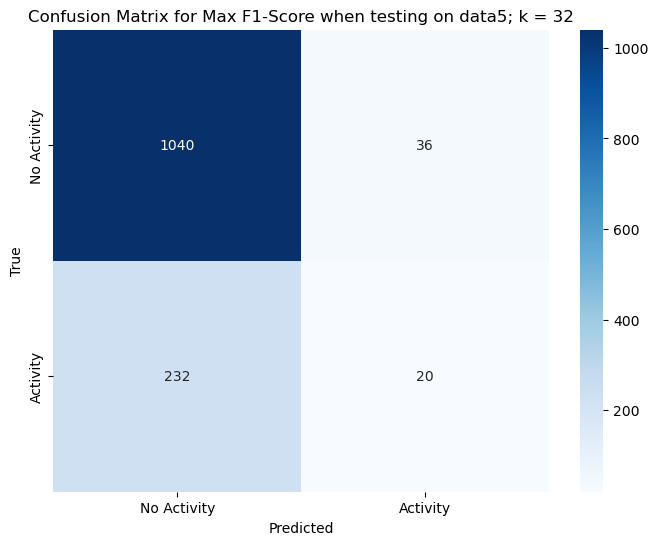

data5 has been tested on everyone


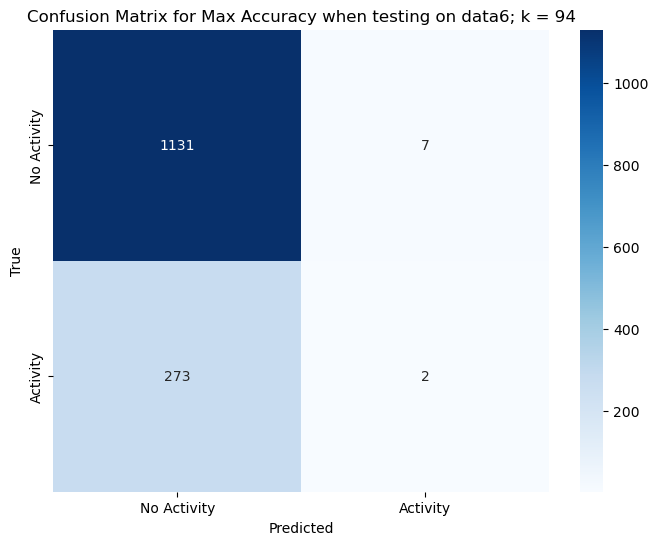

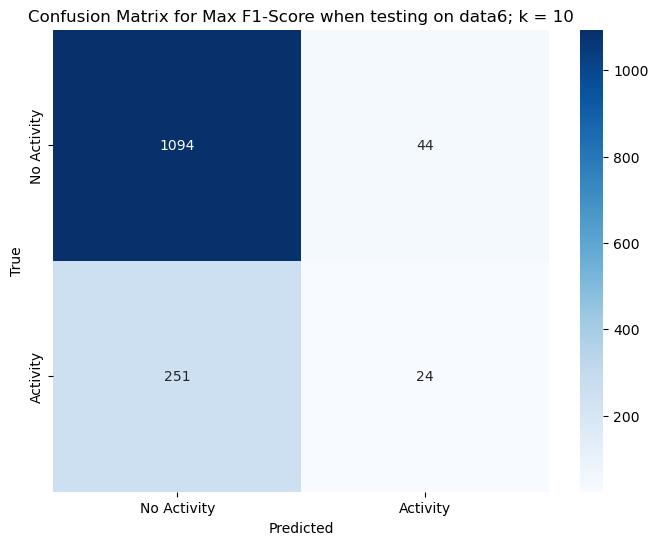

data6 has been tested on everyone


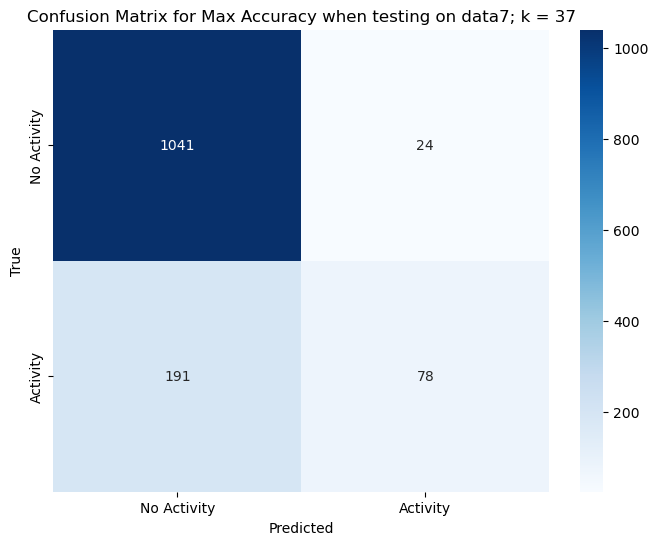

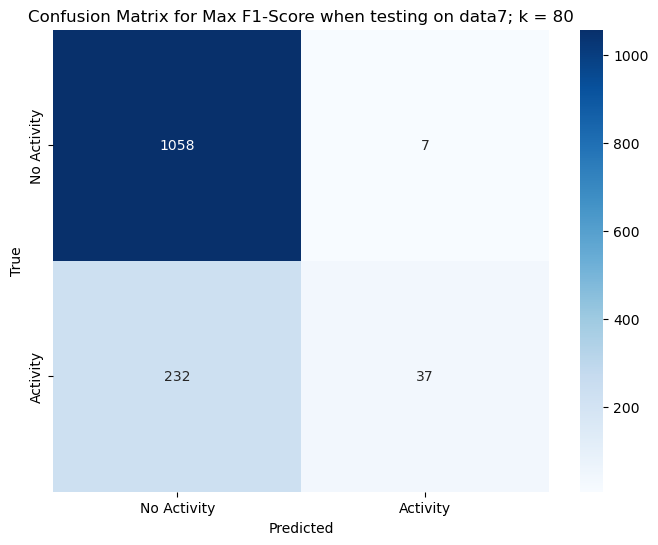

data7 has been tested on everyone


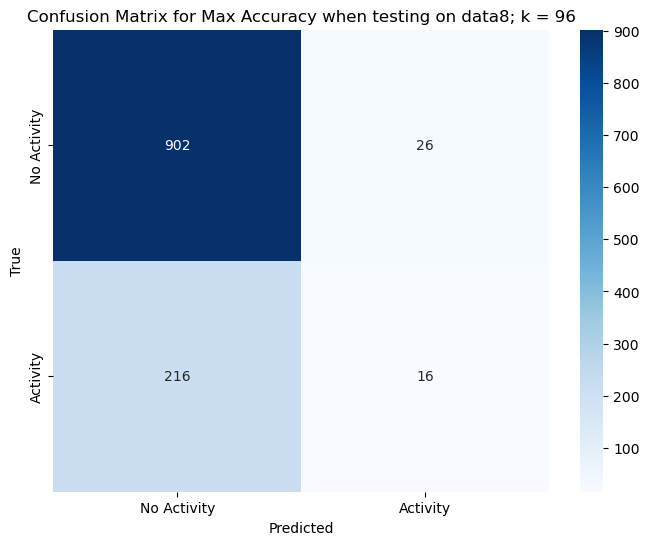

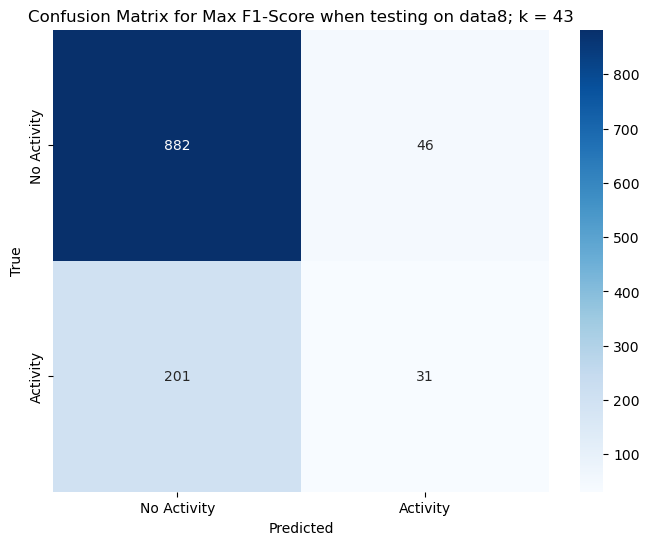

data8 has been tested on everyone


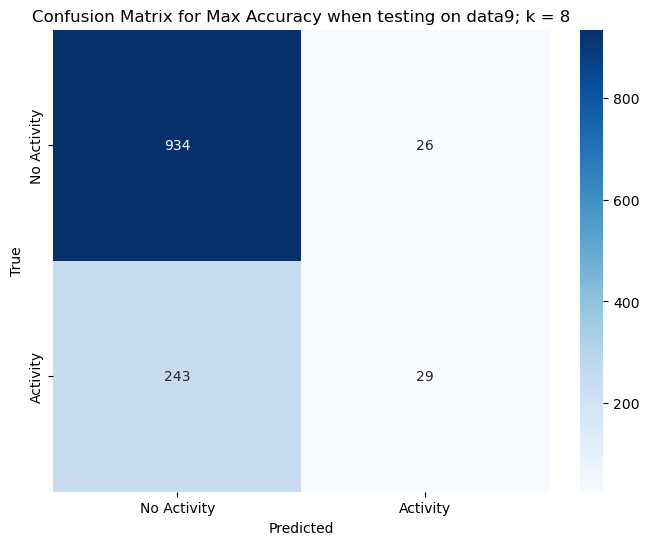

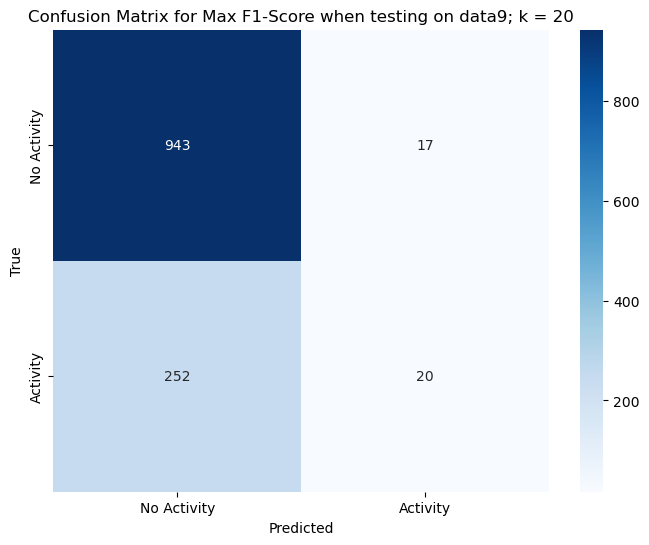

data9 has been tested on everyone


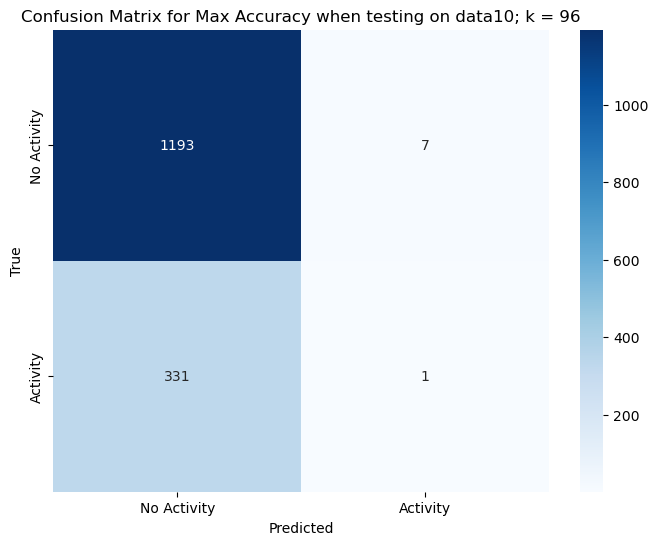

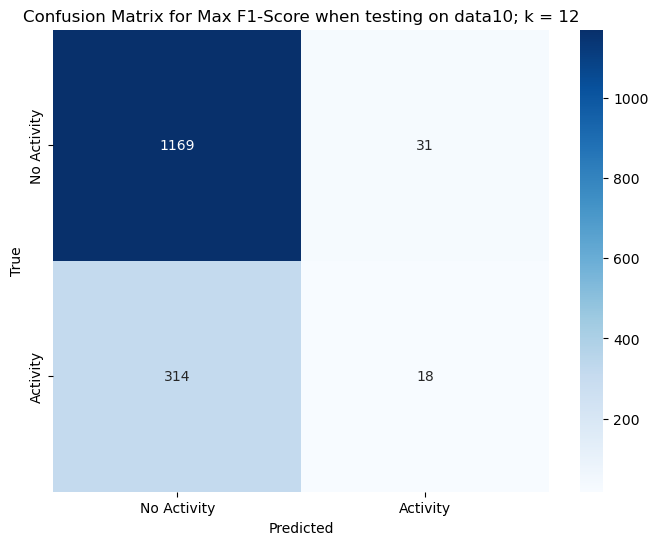

data10 has been tested on everyone


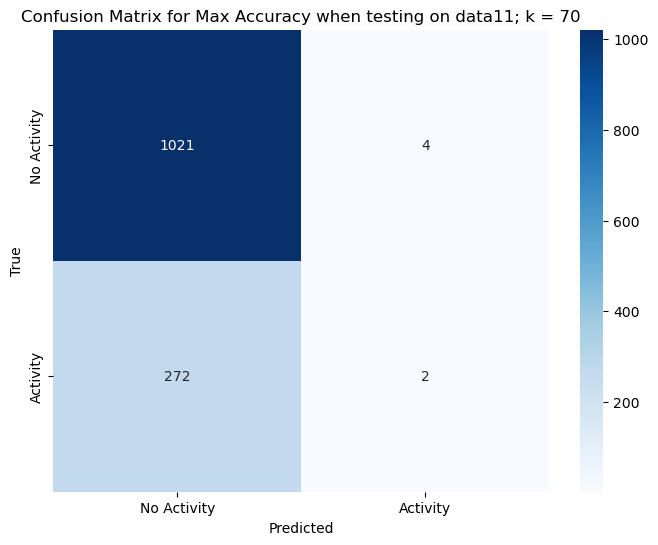

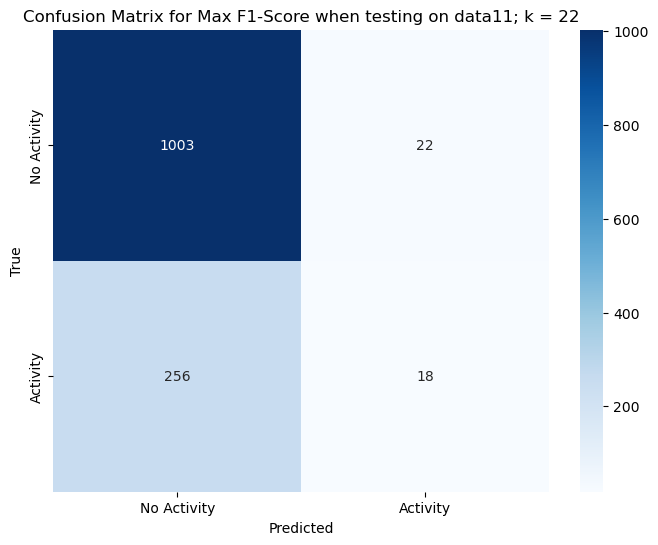

data11 has been tested on everyone


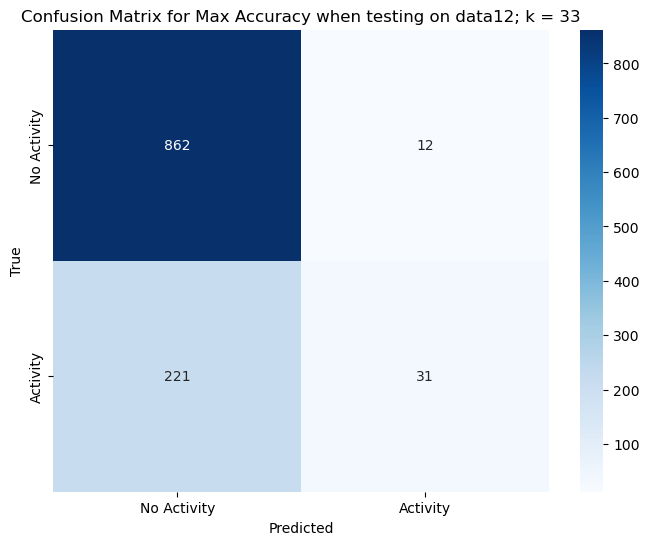

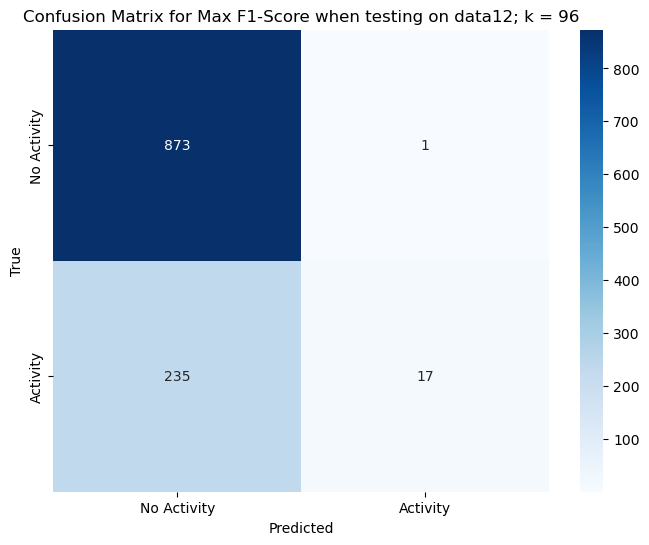

data12 has been tested on everyone


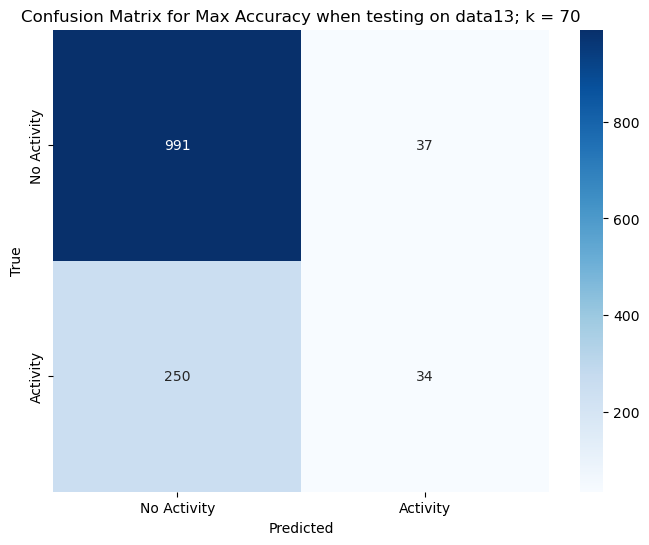

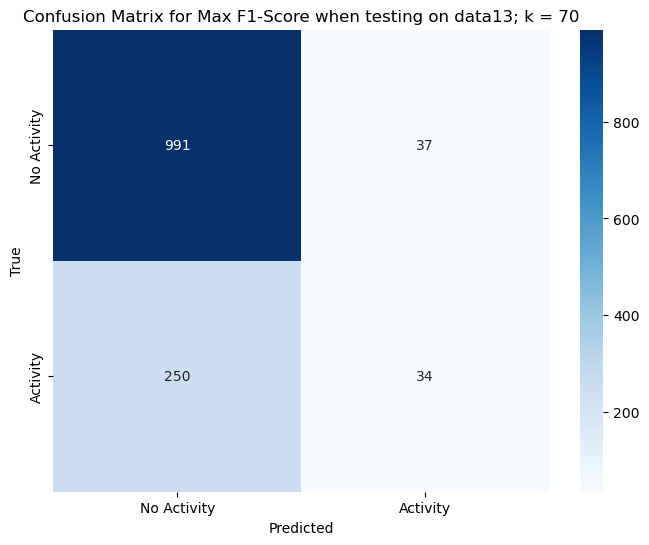

data13 has been tested on everyone


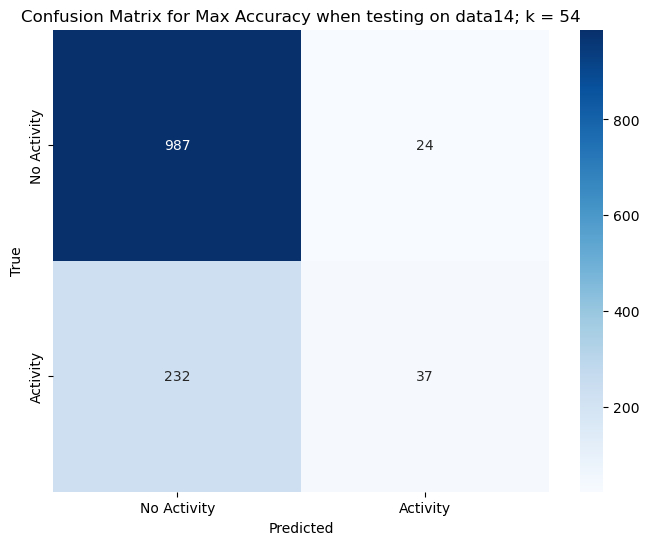

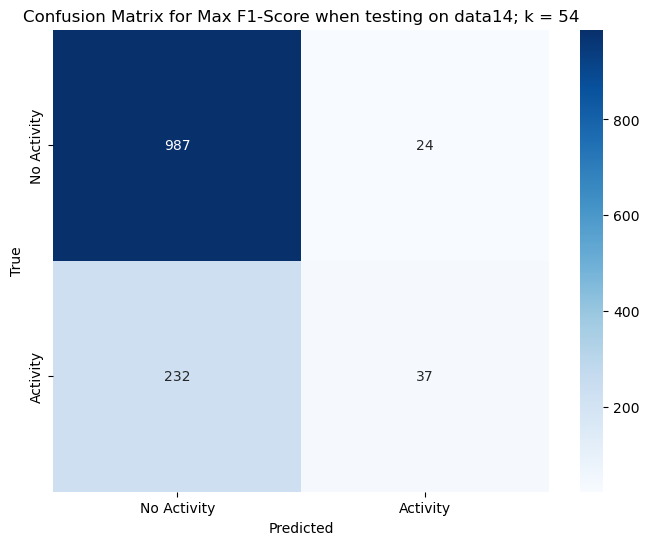

data14 has been tested on everyone


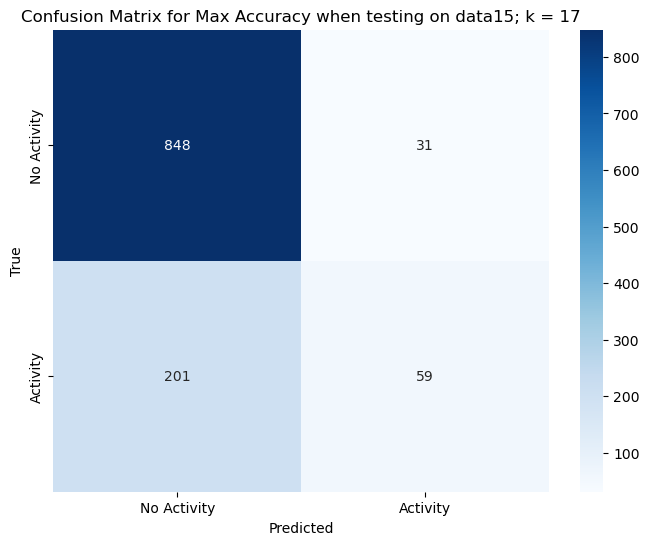

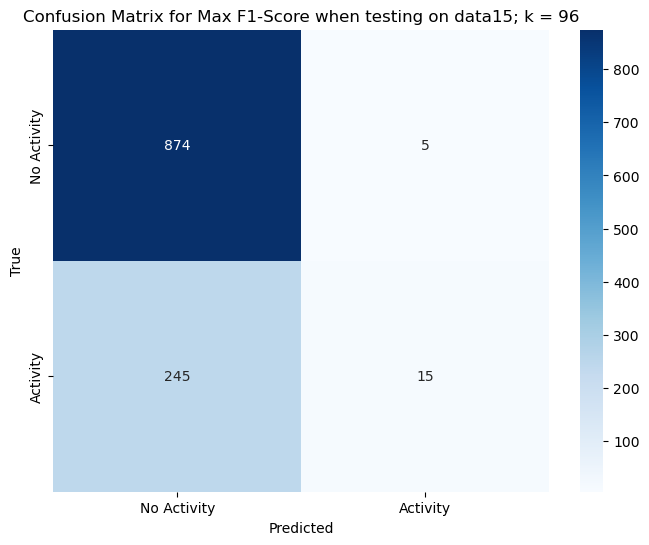

data15 has been tested on everyone


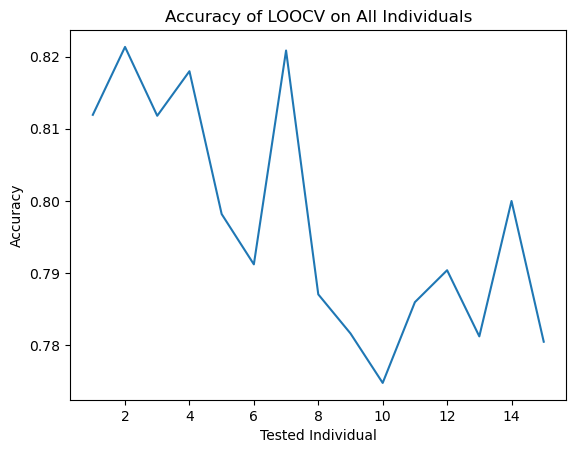

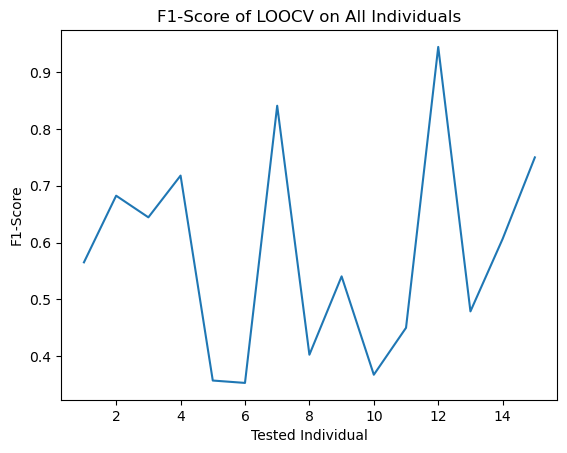

Average Accuracy:  0.7969992411888511
Average F1-Score:  0.5801002202402284


In [6]:
## ACC_specific_windowed_features.csv
## HR_specific_windowed_features.csv
## BVP_specific_windowed_features.csv
## 0: baseline, other measures
## 1: stairs, soccer, cycling, walking

dataframes = {}
for i in np.arange(1,16):
    name = f"data{i}"
    acc = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/ACC_specific_windowed_features.csv")
    hr = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/HR_specific_windowed_features.csv")
    bvp = pd.read_csv(f"HAR/ppg+dalia/data/PPG_FieldStudy/S{i}/S{i}_E4/BVP_specific_windowed_features.csv")
    acc['start_time'] = pd.to_datetime(acc['start_time'])
    hr['start_time'] = pd.to_datetime(hr['start_time'])
    bvp['start_time'] = pd.to_datetime(bvp['start_time'])
    acc['end_time'] = pd.to_datetime(acc['end_time'])
    hr['end_time'] = pd.to_datetime(hr['end_time'])
    bvp['end_time'] = pd.to_datetime(bvp['end_time'])

    common_columns = ['start_time', 'end_time', 'activity']
    data = acc.merge(hr, on=common_columns, how='inner').merge(bvp, on=common_columns, how='inner')
    allFeatures  = [col for col in data.columns if col not in ["start_time", "end_time"]]
    data = data[allFeatures]
    data.loc[data['activity'].isin([0, 1, 2, 7, 8, 9]), 'activity'] = 0
    data.loc[data['activity'].isin([3, 4, 5, 6]), 'activity'] = 1
    dataframes[name] = data

    
for key, df in dataframes.items():
    numerical_cols = [col for col in df.columns if col != 'activity']

    scaled_data = StandardScaler().fit_transform(df[numerical_cols])
    
    pca = PCA(n_components=20)
    pca_data = pca.fit_transform(scaled_data)
    pca_df = pd.DataFrame(data=pca_data, columns=[f'PCA{i}' for i in range(1, 21)])  # Adjust column names as needed
    pca_df['activity'] = df['activity']
    
    dataframes[key] = pca_df
    
LOOCVAccuracy = np.array([])
LOOCVf1_score = np.array([])
for tester in dataframes:
    trainingFeatures  = [col for col in dataframes[tester].columns if col not in ["activity", "start_time", "end_time"]]
    
    testingFeatures = dataframes[tester][trainingFeatures].to_numpy()
    testingActivity = dataframes[tester]["activity"].to_numpy()
    
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for trainer in dataframes:
        if trainer != tester:
            X_train = pd.concat([X_train, dataframes[trainer][trainingFeatures]], ignore_index=True)
            y_train = pd.concat([y_train, dataframes[trainer]["activity"]], ignore_index=True)

    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy().flatten()
    
    testingFeatures = StandardScaler().fit_transform(testingFeatures)
    X_train = StandardScaler().fit_transform(X_train)

    
    k = np.arange(1,100)
    accuracy = np.array([])
    f1score = np.array([])
    maxAccK = 0
    maxF1K = 0
    maxAcc = 0
    maxF1 = 0
    for i in k:
        knn = KNeighborsClassifier(i)
        knn.fit(X_train, y_train)
        acc = (accuracy_score(testingActivity, knn.predict(testingFeatures)))
        f1 = precision_score(testingActivity, knn.predict(testingFeatures))
        accuracy = np.append(accuracy, acc)
        f1score = np.append(f1score, f1)
        if acc > maxAcc:
            maxAccK = i
            maxAcc = acc
        if f1 > maxF1:
            maxF1K = i
            maxF1 = f1


    knn = KNeighborsClassifier(maxAccK)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for Max Accuracy when testing on {tester}; k = {maxAccK}")
    plt.show()
    
    knn = KNeighborsClassifier(maxF1K)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(testingFeatures)
    cmat = confusion_matrix(testingActivity, y_pred) #validate model predictions with actual y values
    labels = ["No Activity", "Activity"]

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cmat, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for Max F1-Score when testing on {tester}; k = {maxF1K}")
    plt.show()
    
    LOOCVAccuracy = np.append(LOOCVAccuracy, accuracy_score(testingActivity, y_pred))
    LOOCVf1_score = np.append(LOOCVf1_score, precision_score(testingActivity, y_pred))
    
    print(f"{tester} has been tested on everyone")

plt.plot(np.arange(1,16), LOOCVAccuracy)
plt.title("Accuracy of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("Accuracy")
plt.show()

plt.plot(np.arange(1,16), LOOCVf1_score)
plt.title("F1-Score of LOOCV on All Individuals")
plt.xlabel("Tested Individual")
plt.ylabel("F1-Score")
plt.show()

print("Average Accuracy: ", sum(LOOCVAccuracy) / len(LOOCVAccuracy))
print("Average F1-Score: ", sum(LOOCVf1_score) / len(LOOCVf1_score))
